In [517]:
import itertools
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as plt_patches
import matplotlib.ticker as plt_ticker
import numpy as np
import statistics

In [518]:
UNKNOWN = -1
matrix_props = {
        # 2-condition estimated with impl of https://onlinelibrary.wiley.com/doi/full/10.1002/nla.2235
        # name: (rows, nnz, condest_2, cond_1) # old_cond_2
        'af_0_k101':(503625, 17550675, 5.52436e+05, UNKNOWN), # condest_2 did not converge after 200000 iters
        'af_shell9':(504855, 17588845, 1.2e+06, UNKNOWN), # condest_2 did not converge after 200000 iters
        'apache2':(715176, 4817870, 3.0e+06, UNKNOWN), # condest_2 did not converge after 200000 iters
#        'airfoil_2d':(14214, 259688, UNKNOWN, 7.051214800834927e+07),
        'atmosmodj':(1270432, 8814880, 6.4e+03, 2.4241360318903107e+11),
        'BenElechi1':(245874, 13150496, 1.33193e+06, UNKNOWN), # condest_2 did not converge after 200000 iters
#        'big':(13209, 91465, UNKNOWN, 2.37626255649969e8),
        'bone010':(986703, 47851783,  1.58571e+06, UNKNOWN), # condest_2 did not converge after 200000 iters
        'Bump_2911':(2911419, 127729899, 7.47203e+06, UNKNOWN), # condest_2 did not converge after 200000 iters
#        'cage11':(39082,559722, UNKNOWN, 96.78026445506869),
        'cage13':(445315, 7479343,  1.1e+01, UNKNOWN),
        'cage14': (1505785, 27130349, 9.6e+00, UNKNOWN),
#        'circuit_3':(14734, 95053,  UNKNOWN, UNKNOWN),
        'crankseg_1':(52804, 10614210, 1.4e+07, UNKNOWN), # condest_2 did not converge after 200000 iters
        'CurlCurl_2':(806529, 8921789, 4.13804e+05, UNKNOWN), # condest_2 did not converge after 200000 iters
        'CurlCurl_4':(2380515, 26515867, 3.39479e+05, UNKNOWN), # condest_2 did not converge after 200000 iters
#        'dc1':(116835, 766396, UNKNOWN, 1.014020261438112e10),
#        'ecl32':(51993, 380415, UNKNOWN, 9.40622740793613e15),
        'ecology2':(999999, 4995991, 3.2e+07, UNKNOWN), # condest_2 did not converge after 200000 iters
#        'epb1':(12127, 48137, UNKNOWN, 9586.35979658557),
#        'epb2':(25228, 175027, UNKNOWN, 5286.429583677932),
#        'epb3':(84617, 463625, UNKNOWN, 74546.44749372818),
        'F1':(343791, 26837113, 7.11159e+05, 3.2618e+07), # condest_2 did not converge after 200000 iters
        'FEM_3D_thermal2':(147900, 3489300, 2.5e+03, 6634.007468826691),
#        'flowmeter5':(9669, 67391, UNKNOWN, 1.619281696341096e7),
        'G3_circuit':(1585478, 7660826, 5.99363e+06, UNKNOWN), # condest_2 did not converge after 200000 iters
#        'Goodwin_040':(17922, 561677, UNKNOWN, 2.563286414491618e+6),
#        'Goodwin_054':(32510, 1030878, UNKNOWN, 6.303017682845868e6),
#        'Goodwin_071':(56021, 1797934, UNKNOWN, 1.4323230024659762e7),
#        'Goodwin_095':(100037, 3226066, UNKNOWN, 3.43081372982845e7),
#        'Goodwin_127':(178437, 5778545, UNKNOWN, 8.196575894759336e7),
        'hood':(220542, 9895422, 3.80805e+05, UNKNOWN), # condest_2 did not converge after 200000 iters
#        'ifiss_mat':(96307, 3599932, UNKNOWN, 80859.56760376305),
        'language':(399130, 1216334, 5.9e+02, 444.72425473331526),
        'marine1':(400320, 6226538, 3.80805e+05, UNKNOWN), # condest_2 did not converge after 200000 iters
        'mc2depi':(525825, 2100225, 1.31138e+14, 1.6973386824099568e20),
        'ns3Da':(20414, 1679599, 5.6e+02, 9116.379665429138),
        'parabolic_fem':(525825, 3674625, 2.1e+05, 165550.77706246587), # condest_2 did not converge after 200000 iters
        'poisson3Db':(85623, 2374949, 2.6e+03, UNKNOWN),
        'pwtk':(217918, 11524432, 694821, UNKNOWN),
        'rajat31':(4690002, 20316253, 4.0e+06, 1.3847357370415895e9),
        'stomach':(213360, 3021648, 2.9e+01, 86.52670228402597),
        't2em':(921632, 4590832, 2.23759e+05, UNKNOWN), # condest_2 did not converge after 200000 iters
        'thermal2':(1228045, 8580313, 1.49454e+06, UNKNOWN), # condest_2 did not converge after 200000 iters
        'tmt_unsym':(917825, 4584801, 2.34515e+08, UNKNOWN),  # condest_2 did not converge after 200000 iters
        'torso2':(115967, 1033473, 2.0e+01, 51.90308),
        'torso3':(259156, 4429042, 9.5e+01, 575.8686181859905),
#        'wang3':(26064, 177168, UNKNOWN, 10705.081320921818),
        'venkat01':(62424, 1717792, 1.25593e+05, 2.3795367915095505e6), # condest_2 did not converge after 200000 iters
#        'Zhao1':(33861, 166453, UNKNOWN, 1345.0635801723902)
}

In [519]:
double_color = '#555555'
sprec_color = '#888888'
mixed_color = '#AAAAAA'
single_color = '#CCCCCC'

speedup_color = '#FB9A29'

skip_single_prec = False

matplotlib.rc('font', **{'size': 7})

In [520]:
# based on https://matplotlib.org/examples/api/barchart_demo.html
def label_bars(ax, labels, bars, **kwargs):
    """
    Attach a text label above each bar displaying its height
    """
    for label,bar in zip(labels,bars):
        print(bar.get_height())
        ax.text(bar.get_x() + bar.get_width()/2., 1.05*2**(bar.get_height()),
                label,
                ha='center', va='bottom',
                **kwargs)
    
def mat_names(timings):
    return np.array(sorted(timings.keys(), key = lambda s: s.casefold()))

def string_to_inf(arr):
    return [math.inf if x == '-' else x for x in arr]

def get_prop(timings, names, prop):
    if prop == 'rows':
        return np.array([matrix_props[mat][0] for mat in names])
    elif prop == 'nnz':
        return np.array([matrix_props[mat][1] for mat in names])
    elif prop == 'cond 2':
        return np.array([matrix_props[mat][2] for mat in names])
    elif prop == 'cond 1':
        return np.array([matrix_props[mat][3] for mat in names])
    
    elif prop == 'baseline min':
        return np.array([timings[mat][0][0] for mat in names])
    elif prop == 'baseline med':
        return np.array([timings[mat][0][1] for mat in names])
        #return np.array([(timings[mat][0][1] if mat in timings else 0) for mat in names])
    elif prop == 'baseline max':
        return np.array([timings[mat][0][2] for mat in names])
    elif prop == 'mixed min':
        return np.array(string_to_inf([timings[mat][1][0] for mat in names]))
    elif prop == 'mixed med':
        return np.array(string_to_inf([timings[mat][1][1] for mat in names]))
        #return np.array([(timings[mat][1][1] if mat in timings else 0) for mat in names])
    elif prop == 'mixed max':
        return np.array(string_to_inf([timings[mat][1][2] for mat in names]))
    elif prop == 'singleprec min':
        return np.array(string_to_inf([timings[mat][2][0] for mat in names]))
    elif prop == 'singleprec med':
        return np.array(string_to_inf([timings[mat][2][1] for mat in names]))
    elif prop == 'singleprec max':
        return np.array(string_to_inf([timings[mat][2][2] for mat in names]))
    elif prop == 'single min':
        return np.array(string_to_inf([timings[mat][3][0] for mat in names]))
    elif prop == 'single med':
        return np.array(string_to_inf([timings[mat][3][1] for mat in names]))
    elif prop == 'single max':
        return np.array(string_to_inf([timings[mat][3][2] for mat in names]))
    
    elif prop == 'baseline restarts':
        return np.array([timings[mat][0][3] for mat in names])
    elif prop == 'baseline iterations':
        return np.array([timings[mat][0][4] for mat in names])
    elif prop == 'mixed restarts':
        return np.array([timings[mat][1][3] for mat in names])
    elif prop == 'mixed iterations':
        return np.array([timings[mat][1][4] for mat in names])
    
    elif prop == 'speedup min':
        return get_prop(timings, names, 'baseline min') / get_prop(timings, names, 'mixed max')
    elif prop == 'speedup med':
        return get_prop(timings, names, 'baseline med') / get_prop(timings, names, 'mixed med')
    elif prop == 'speedup max':
        return get_prop(timings, names, 'baseline max') / get_prop(timings, names, 'mixed min')
    
    elif prop == 'iterations per restart':
        return get_prop(timings, names, 'baseline iterations') / get_prop(timings, names, 'baseline restarts')
    elif prop == 'nnz per row':
        return get_prop(timings, names, 'nnz') / get_prop(timings, names, 'rows')
    
    else:
        raise ValueError('Unknown property "'+prop+'"')
        
def get_prop_logbase(prop):
    if prop in ['speedup min', 'speedup med', 'speedup max']:
        return 2
    else:
        return 10
    
def plot_speedups(timings_set, timings_labels, desc, added_modifications=(lambda: None), save=False,
                  skip_single_prec=False, small_figure=False, yticks=[0.5, 1.0, 2.0]):
    names = mat_names(timings_set[0])
    for timings in timings_set:
        if (names != mat_names(timings)).any(): raise Error('Mismatched names')
    
    configs = [('singleprec', 'Preconditioner', sprec_color),
               ('mixed', 'Mixed', mixed_color),
               ('single', 'Single', single_color)]
    if skip_single_prec:
        configs = configs[1:]
    config_count = len(configs)
    
    entries = config_count*len(timings_set)
    gap = 1.0/(2+config_count)
    width = (1.0-gap)/config_count
    offset = (gap-1.0 + width)/2.0
    
    x_vals = np.array(range(len(names)))
    
    fig_width = 3.5 if small_figure else 7
    plt.figure(figsize=(fig_width,2.35))
    
    y_min = 1
    
    for (timings, t_label) in zip(timings_set, timings_labels):
        baseline_min = get_prop(timings, names, 'baseline min')
        baseline_med = get_prop(timings, names, 'baseline med')
        baseline_max = get_prop(timings, names, 'baseline max')
        
        print('baseline mean runtime: ' + str(statistics.geometric_mean(baseline_med)))
        
        for (key, label, color) in configs:
            time_min = get_prop(timings, names, key+' min')
            time_med = get_prop(timings, names, key+' med')
            time_max = get_prop(timings, names, key+' max')
            
            speedup_min = baseline_min / time_max
            speedup_med = baseline_med / time_med
            speedup_max = baseline_max / time_min
            speedup_err = np.array([speedup_med - speedup_min, speedup_max - speedup_med])
            
            y_min = min(y_min, np.amin(speedup_min[np.nonzero(speedup_min)]))

            print(key+' mean runtime: '
                  + str(statistics.geometric_mean(filter(lambda x: not math.isinf(x), time_med))))
            print(key+' mean speedup: '
                  + str(statistics.geometric_mean(filter(lambda x: x != 0, speedup_med))))
            
            # replace 0 with almost 0
            speedup_min[speedup_min == 0] = 10^-10
            speedup_med[speedup_med == 0] = 10^-10
            speedup_max[speedup_max == 0] = 10^-10
                  
            plt.bar(x_vals+offset, speedup_med-1, yerr=speedup_err, bottom = 1,
                    width=width, label=t_label+' '+label,
                    color=color)

            offset += width

    plt.yscale('log', basey=2)
    default_ylim = plt.ylim()
    plt.ylim(bottom=y_min*0.9)
    print(str(default_ylim)+' ticked w/ ' + str(yticks))
    plt.gca().set_yticks(yticks)
    plt.gca().yaxis.set_major_formatter(plt_ticker.ScalarFormatter())
    plt.ylabel('Speedup over baseline')
    
    plt.gca().margins(x=0.01)
    plt.xticks(rotation=90, ticks=x_vals, labels=names)
    
    added_modifications()
        
    plt.gcf().tight_layout()
    if save:
        plt.savefig('../../TPDS - Exascale issue/graphics/'+desc+'.eps', bbox_inches='tight')
    plt.show()
        
def iter_count_colors(data):
    return lambda names: [      '#ff0000' if base_iter < mixed_iter
                          else ('#00ff00' if base_iter > mixed_iter
                          else  '#4090ff')
                          for name in names
                          for base_iter  in [data[name][0][4]]
                          for mixed_iter in [data[name][1][4]]]

def iter_count_colors_thresh(data, thresh):
    return lambda names: [      '#ff0000' if base_iter*(1+thresh) < mixed_iter
                          else ('#00ff00' if base_iter*(1-thresh) > mixed_iter
                          else  '#4090ff')
                          for name in names
                          for base_iter  in [data[name][0][4]]
                          for mixed_iter in [data[name][1][4]]]

def plot_scatter(timings, x_prop, y_prop, xlog=True, ylog=True, colors=(lambda _: '#4090ff'), added_modifications=(lambda: None), save=False):
    plt.figure()
    print(x_prop + ' vs '+y_prop+':')
    names_all = mat_names(timings)
    
    # main plot
    
    x_all = get_prop(timings, names_all, x_prop)
    y_all = get_prop(timings, names_all, y_prop)
    missing = np.logical_or(x_all == UNKNOWN, y_all == UNKNOWN)
    if np.any(missing):
        print('  Missing fields for: ' + str(names_all[missing]))
    
    names = names_all[np.logical_not(missing)]
    x = x_all[np.logical_not(missing)]
    y = y_all[np.logical_not(missing)]
    
    plt.scatter(x, y, color=colors(names))
    
    
    # Line of best fit
    if xlog:
        x_regression = np.log(x)
    else:
        x_regression = x
        
    if ylog:
        y_regression = np.log(y)
    else:
        y_regression = y
        
    coeffs = np.polyfit(x_regression, y_regression, 1)
    line_best_fit = np.poly1d(coeffs)
    
    y_predicted = np.poly1d(coeffs)(x_regression)
    ss_pred = np.sum((y_regression - y_predicted)**2) /  len(y_regression)
    
    mean = np.sum(y_regression)/len(y_regression)
    ss_mean = np.sum((y_regression - mean)**2) /  len(y_regression)
    
    if ylog:
        y_predicted_plot = np.exp(y_predicted)
    else:
        y_predicted_plot = y_predicted
        
    if xlog:
        x_regression_plot = np.exp(x_regression)
    else:
        x_regression_plot = x_regression
    plt.plot(x, y_predicted_plot)
    
    print('  ' + ('log ' if ylog else '') + 'y = ' + str(coeffs[0]) + '*' + ('log ' if xlog else '') + 'x + ' + str(coeffs[1]))
    print('  r^2 = ' + str(1- ss_pred / ss_mean))
    
    # header stuff
    
    plt.title(x_prop + ' vs '+y_prop)
    plt.xlabel(x_prop)
    plt.ylabel(y_prop)
    
    
    if xlog:
        plt.xscale('log', basex=get_prop_logbase(x_prop))
    if ylog:
        plt.yscale('log', basey=get_prop_logbase(y_prop))
        
        if get_prop_logbase(y_prop) == 2:
            default_ylim = plt.ylim()
            plt.ylim(top=max(2, default_ylim[1]))
            plt.yscale('log', basey=2)
            plt.gca().yaxis.set_major_locator(plt_ticker.MultipleLocator(0.25))
            plt.gca().yaxis.set_major_formatter(plt_ticker.ScalarFormatter())
          
    added_modifications()
    
    plt.gcf().tight_layout()
    if save:
        plt.savefig('../../notes/graphics/'+desc+path_append, dpi=300)
    else:
        plt.show()

# Identity Preconditioner

MGS, identity, restart smart:
baseline mean runtime: 2.767689393581376
mixed mean runtime: 2.3542221557160548
mixed mean speedup: 1.1756279613890397
single mean runtime: 3.362786812957113
single mean speedup: 1.003396527362195
(0.23127122805601463, 3.601553954773735) ticked w/ [0.25, 0.75, 0.5, 1.0, 1.5, 2.0, 3.0]


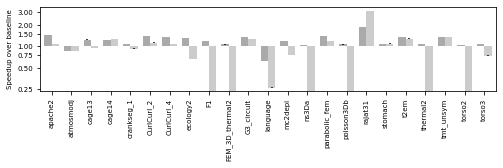

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


CGSR, identity, restart smart:
baseline mean runtime: 2.030566665312988
mixed mean runtime: 1.2612341795516497
mixed mean speedup: 1.6099838540966473
single mean runtime: 1.5419937504722565
single mean speedup: 1.3455294299308969
(0.3993284385778852, 4.831923749975115) ticked w/ [0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 4.0]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


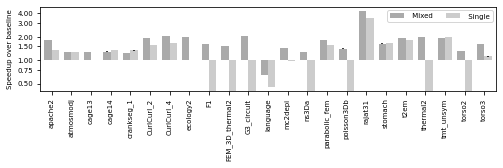

In [521]:
timings_restartsmart_mgs_identity = {
'apache2': [(57.906500378000004, 57.907500291, 58.087300362, 214, 21400, '100', 'R1e-06', '0'), (39.99328483, 40.0176078, 40.218672095, 215, 21500, '100', '0', '0'), (59.009800503, 59.146600303, 59.148100543, 215, 21500, '100', '0', '0'), (54.274096682999996, 54.286274576, 54.51663405, 292, 29200, '100', '0', '0')],
'atmosmodj': [(0.8573798029999999, 0.85773747, 0.858811071, 2, 200, '100', '0', '0'), (0.988516121, 0.989318213, 0.990401253, 3, 300, '100', 'R1e-06', '0'), (1.298316764, 1.298681734, 1.298898135, 3, 300, '100', '0', '0'), (0.9870047900000001, 0.987646382, 0.9900504339999999, 3, 300, '100', 'R1e-06', '0')],
'cage13': [(0.024904659000000003, 0.024997176, 0.025254498, 2, 30, '100', 'R1e-06', '0'), (0.020153806, 0.020202266, 0.020212791, 2, 30, '100', 'R1e-06', '0'), (0.026046645, 0.02605321, 0.026073303, 2, 30, '100', 'R1e-06', '0'), (0.026462224, 0.026532212000000003, 0.026563237, 3, 45, '100', 'R1e-06', '0')],
'cage14': [(0.06315935, 0.06321397599999999, 0.06357874499999999, 2, 30, '100', 'R1e-06', '0'), (0.05158555, 0.05165791, 0.05170916, 2, 30, '100', 'R1e-06', '0'), (0.066773776, 0.066775797, 0.066790864, 2, 30, '100', 'R1e-06', '0'), (0.05011919, 0.05039668, 0.0505405, 2, 30, '100', 'R1e-06', '0')],
'crankseg_1': [(5.554700561000001, 5.559090513, 5.595220654, 63, 6300, '100', 'R1e-06', '0'), (5.167632908, 5.180280506, 5.232553036, 63, 6300, '100', 'R1e-06', '0'), (5.606470391999999, 5.6330508859999995, 5.657840631, 63, 6300, '100', '1e-10', '0'), (5.955628459000001, 5.9793606409999995, 6.0029278569999995, 73, 7300, '100', 'R1e-06', '0')],
'CurlCurl_2': [(29.951700354, 29.986700508, 30.03460047, 99, 9900, '100', 'R1e-06', '0'), (21.4656837, 21.476979335000003, 21.546989463000003, 99, 9900, '100', 'R1e-06', '0'), (30.384400625999998, 30.479700523, 30.484400488000002, 99, 9900, '100', '0', '0'), (26.560506683, 26.580759527999998, 26.671329285, 123, 12300, '100', '0', '0')],
'CurlCurl_4': [(152.65900044999998, 152.712000481, 152.786000542, 211, 21100, '100', '1e-10', '0'), (114.73403623, 114.76504425, 114.83205541000001, 211, 21100, '100', 'R1e-06', '0'), (155.265000276, 155.347000623, 155.398000599, 211, 21100, '100', '0', '0'), (143.16327817, 143.17729014, 143.31730951, 264, 26400, '100', 'R1e-06', '0')],
'ecology2': [(3.124130309, 3.12464051, 3.13036041, 9, 900, '100', '1e-10', '0'), (2.359413343, 2.359530138, 2.3664170440000003, 9, 900, '100', '0', '0'), (3.175670354, 3.177010457, 3.177250324, 9, 900, '100', '0', '0'), (4.6734472910000004, 4.673633347, 4.690666644999999, 18, 1800, '100', '0', '0')],
'F1': [(51.61559025, 51.73664186, 51.86915115, 292, 29200, '100', 'R1e-06', '0'), (43.72623186, 43.83144616, 44.09684101, 292, 29200, '100', 'R1e-06', '0'), (51.28400627, 51.38970409, 51.57547925, 287, 28700, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'FEM_3D_thermal2': [(0.301370326, 0.308452386, 0.31124325599999997, 3, 300, '100', '0', '0'), (0.28998579, 0.290028283, 0.290623581, 3, 300, '100', 'R1e-06', '0'), (0.308282352, 0.310129489, 0.311453367, 3, 300, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'G3_circuit': [(139.996000374, 140.06500038, 140.214000483, 282, 28200, '100', '1e-10', '0'), (104.91343617999999, 104.944437148, 105.07644849699999, 275, 27500, '100', 'R1e-06', '0'), (94.93560038, 94.94300047499999, 95.132700355, 188, 18800, '100', 'R1e-06', '0'), (111.077708699, 111.109671185, 111.123761505, 292, 29200, '100', '1e-10', '0')],
'language': [(0.060989337000000005, 0.061011031, 0.061377508, 1, 29, '100', 'R1e-06', '0'), (0.09906351899999999, 0.09910835, 0.099637099, 2, 58, '100', 'R1e-06', '0'), (0.11741541200000001, 0.117469353, 0.117561378, 2, 58, '100', 'R1e-06', '0'), (0.23062084, 0.23285641, 0.232969347, 5, 145, '100', 'R1e-06', '0')],
'mc2depi': [(21.203500281999997, 21.257100368, 21.270100332, 104, 10400, '100', '1e-10', '0'), (17.845748670000003, 17.849350581, 17.850458059, 121, 12100, '100', '0', '0'), (23.483100271, 23.565700318, 23.599400401, 114, 11400, '100', '0', '0'), (28.446690429, 28.456276674, 28.519738087, 195, 19500, '100', '0', '0')],
'ns3Da': [(1.061688809, 1.062386613, 1.062831625, 14, 1400, '100', 'R1e-06', '0'), (1.0241656430000001, 1.028080383, 1.0330227779999999, 14, 1400, '100', 'R1e-06', '0'), (1.0715969561, 1.082635786, 1.092685046, 14, 1400, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'parabolic_fem': [(7.2671553289999995, 7.284766309, 7.300906934, 35, 3500, '100', '0', '0'), (5.253329476, 5.256393716, 5.264258899, 35, 3500, '100', 'R1e-06', '0'), (7.372354894, 7.385781212, 7.406577562, 35, 3500, '100', '0', '0'), (6.134012966999999, 6.1392497399999995, 6.159745064, 41, 4100, '100', 'R1e-06', '0')],
'poisson3Db': [(0.256030458, 0.258431572, 0.259967201, 3, 300, '100', 'R1e-06', '0'), (0.241280698, 0.241921272, 0.24461478399999997, 3, 300, '100', 'R1e-06', '0'), (0.259547246, 0.259991605, 0.262176836, 3, 300, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'rajat31': [(51.062800417000005, 51.086100608, 51.08860048, 40, 4000, '100', 'R1e-06', '0'), (27.441047429, 27.463344570999997, 27.465450562, 29, 2900, '100', 'R1e-06', '0'), (54.599600679000005, 54.606600725, 54.623700883, 42, 4200, '100', '0', '0'), (16.070620310000002, 16.07286402, 16.08418121, 17, 1700, '100', '1e-10', '0')],
'stomach': [(0.33910125199999996, 0.340535229, 0.342962343, 3, 300, '100', '1e-10', '0'), (0.315749351, 0.316804379, 0.319665248, 3, 300, '100', 'R1e-06', '0'), (0.341470326, 0.343376371, 0.343992326, 3, 300, '100', '0', '0'), (0.31259050000000005, 0.31359485400000003, 0.313642394, 3, 300, '100', '1e-10', '0')],
't2em': [(15.656100474, 15.665800541000001, 15.667400627000001, 48, 4800, '100', '1e-10', '0'), (11.502656996, 11.521154709, 11.526575532999999, 48, 4800, '100', '0', '0'), (15.866300414000001, 15.893500409, 15.895800487999999, 48, 4800, '100', '0', '0'), (12.149835878000001, 12.193709032, 12.209206763000001, 51, 5100, '100', '1e-10', '0')],
'thermal2': [(86.793802961, 86.862070231, 87.004729659, 211, 21100, '100', '0', '0'), (81.096384457, 81.285459187, 81.319757457, 256, 25600, '100', 'R1e-06', '0'), (119.123770979, 119.21172861, 119.332706546, 285, 28500, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'tmt_unsym': [(1.637570346, 1.6388804129999999, 1.641580359, 5, 500, '100', '1e-10', '0'), (1.222274688, 1.222929052, 1.224355251, 5, 500, '100', '0', '0'), (1.663060487, 1.664770547, 1.6659503420000001, 5, 500, '100', '0', '0'), (1.2148726859999999, 1.219449536, 1.224691736, 5, 500, '100', '0', '0')],
'torso2': [(0.040648047, 0.040675372, 0.040794458000000006, 2, 80, '100', 'R1e-06', '0'), (0.038536584, 0.038625327999999994, 0.038781468, 2, 80, '100', 'R1e-06', '0'), (0.041580993999999996, 0.041632903, 0.041907442, 2, 80, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'torso3': [(0.25784145799999997, 0.258167514, 0.258575616, 2, 200, '100', '1e-10', '0'), (0.24140967, 0.241418934, 0.242298432, 2, 200, '100', 'R1e-06', '0'), (0.25316736799999995, 0.26247246599999996, 0.26298339800000003, 2, 200, '100', '0', '0'), (0.34145502, 0.348157375, 0.34875351499999996, 3, 300, '100', 'R1e-06', '0')],
}


print("MGS, identity, restart smart:")
# plot_times([timings_restartsmart_mgs_identity],
#            [''],
#            'time-rlen=smart-gpu-identity-mgs', save=True,
#            skip_single_prec=True)

plot_speedups([timings_restartsmart_mgs_identity],
              [''],
              'speedup-rlen=smart-gpu-identity-mgs', save=True,
              skip_single_prec=True, yticks=[0.25, 0.75, 0.5, 1.0, 1.5, 2.0, 3.0])

timings_restartsmart_cgsr_identity = {
'apache2': [(41.396200329, 41.39660037, 41.426600383, 214, 21400, '100', '1e-10', '0'), (22.591085402999997, 22.600488334, 22.615767798, 215, 21500, '100', 'R1e-06', '0'), (42.383400444, 42.403600405, 42.407400319000004, 215, 21500, '100', '0', '0'), (30.484684750000003, 30.487451219999997, 30.502130636, 293, 29300, '100', 'R1e-06', '0')],
'atmosmodj': [(0.671000986, 0.671225727, 0.6719821549999999, 2, 200, '100', 'R1e-06', '0'), (0.526359309, 0.526683079, 0.5281252949999999, 3, 300, '100', 'R1e-06', '0'), (1.021363033, 1.021674706, 1.021697374, 3, 300, '100', 'R1e-06', '0'), (0.526842506, 0.526938853, 0.5269834969999999, 3, 300, '100', 'R1e-06', '0')],
'cage13': [(0.024224019, 0.024257003, 0.024306433000000002, 2, 30, '100', 'R1e-06', '0'), (0.018909704, 0.018943581, 0.018959238, 2, 30, '100', 'R1e-06', '0'), (0.025489895000000002, 0.025574129, 0.025606967, 2, 30, '100', 'R1e-06', '0'), (0.024359228, 0.024425637, 0.02453007, 3, 45, '100', 'R1e-06', '0')],
'cage14': [(0.064026513, 0.064228125, 0.06440498, 2, 30, '100', 'R1e-06', '0'), (0.04994798, 0.05000847, 0.05011066, 2, 30, '100', 'R1e-06', '0'), (0.067487434, 0.067504625, 0.06766732, 2, 30, '100', 'R1e-06', '0'), (0.04797215, 0.04807541, 0.04809033, 2, 30, '100', 'R1e-06', '0')],
'crankseg_1': [(3.189110902, 3.1918205179999997, 3.193640425, 62, 6200, '100', 'R1e-06', '0'), (2.570309164, 2.571884853, 2.582786501, 63, 6300, '100', 'R1e-06', '0'), (3.2943008419999997, 3.2967506469999996, 3.300120632, 63, 6300, '100', 'R1e-06', '0'), (2.402387452, 2.4055950189999997, 2.406857913, 59, 5900, '100', 'R1e-06', '0')],
'CurlCurl_2': [(22.267500274, 22.268200401, 22.274400376, 99, 9900, '100', 'R1e-06', '0'), (11.701119474, 11.702788906999999, 11.703901102, 99, 9900, '100', 'R1e-06', '0'), (22.678200443, 22.687200471, 22.693200492000003, 99, 9900, '100', '0', '0'), (14.416549819, 14.425473045, 14.43085174, 123, 12300, '100', 'R1e-06', '0')],
'CurlCurl_4': [(138.763000468, 138.786000505, 138.833000542, 211, 21100, '100', 'R1e-06', '0'), (67.64833603, 67.66534193, 67.68403269000001, 211, 21100, '100', 'R1e-06', '0'), (140.647000717, 140.669000635, 140.688000599, 210, 21000, '100', '0', '0'), (84.33590731999999, 84.34820364000001, 84.35039919, 264, 26400, '100', 'R1e-06', '0')],
'ecology2': [(2.4161103230000003, 2.4163106180000002, 2.416900283, 9, 900, '100', 'R1e-06', '0'), (1.232788679, 1.23397468, 1.234862778, 9, 900, '100', 'R1e-06', '0'), (2.462750245, 2.463080283, 2.463130387, 9, 900, '100', '0', '0'), (2.435840798, 2.437096703, 2.437865347, 18, 1800, '100', 'R1e-06', '0')],
'F1': [(41.88226694, 41.91638845, 41.95998432, 292, 29200, '100', 'R1e-06', '0'), (25.86834004, 25.88583868, 25.895759690000002, 292, 29200, '100', 'R1e-06', '0'), (42.71809084, 42.72289785, 42.75713125, 292, 29200, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'FEM_3D_thermal2': [(0.174097337, 0.174101358, 0.174522319, 3, 300, '100', 'R1e-06', '0'), (0.114589358, 0.114851773, 0.115563262, 3, 300, '100', 'R1e-06', '0'), (0.176609415, 0.17677737899999998, 0.177006532, 3, 300, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'G3_circuit': [(120.423000391, 120.42600029, 120.474000343, 282, 28200, '100', '0', '0'), (59.607440574, 59.617264367, 59.632139536000004, 282, 28200, '100', 'R1e-06', '0'), (105.239000441, 105.270000502, 105.28500039699999, 242, 24200, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'language': [(0.058414724, 0.05850354, 0.058536754, 1, 29, '100', 'R1e-06', '0'), (0.090146483, 0.09052877499999999, 0.090610487, 2, 58, '100', 'R1e-06', '0'), (0.112269342, 0.112283338, 0.112805369, 2, 58, '100', 'R1e-06', '0'), (0.130692938, 0.130807964, 0.130871754, 3, 87, '100', 'R1e-06', '0')],
'mc2depi': [(14.249700369000001, 14.252300281, 14.263900272999999, 102, 10200, '100', '0', '0'), (9.894923492, 9.899273048, 9.900106021, 129, 12900, '100', 'R1e-06', '0'), (15.64640033, 15.659400369, 15.666200397999999, 110, 11000, '100', '0', '0'), (14.776469364999999, 14.777083269, 14.779189714000001, 195, 19500, '100', '0', '0')],
'ns3Da': [(0.34688601599999996, 0.347244496, 0.347812845, 14, 1400, '100', '0', '0'), (0.27516964400000005, 0.27524989899999996, 0.27634612000000003, 14, 1400, '100', 'R1e-06', '0'), (0.355804716, 0.35588716800000003, 0.35620348399999996, 14, 1400, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'parabolic_fem': [(5.02576707, 5.030885581, 5.033688664, 35, 3500, '100', '0', '0'), (2.779651453, 2.779865824, 2.782425184, 35, 3500, '100', 'R1e-06', '0'), (5.15081531, 5.1534083729999995, 5.154032673, 35, 3500, '100', 'R1e-06', '0'), (3.25000907, 3.2540912520000003, 3.257375802, 41, 4100, '100', 'R1e-06', '0')],
'poisson3Db': [(0.130383528, 0.13055640300000002, 0.13071052900000002, 3, 300, '100', 'R1e-06', '0'), (0.092760187, 0.092994068, 0.093189538, 3, 300, '100', 'R1e-06', '0'), (0.133639576, 0.13402597200000002, 0.134159926, 3, 300, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'rajat31': [(50.773400529, 50.780800575, 50.785100534, 40, 4000, '100', '0', '0'), (11.771558463, 11.772164337, 11.77511716, 20, 2000, '100', 'R1e-06', '0'), (52.991300568, 53.004500794, 53.028500632000004, 41, 4100, '100', '0', '0'), (14.67051594, 14.67121714, 14.673632679999999, 25, 2500, '100', '0', '0')],
'stomach': [(0.218744465, 0.219195394, 0.21923534, 3, 300, '100', 'R1e-06', '0'), (0.13434686, 0.135207698, 0.135391302, 3, 300, '100', 'R1e-06', '0'), (0.22268628599999998, 0.22281928699999998, 0.223003279, 3, 300, '100', '0', '0'), (0.131759706, 0.132494963, 0.132663437, 3, 300, '100', '1e-10', '0')],
't2em': [(11.511100446, 11.511700416, 11.51530044, 48, 4800, '100', '0', '0'), (6.01178867, 6.012157789000001, 6.013266832999999, 48, 4800, '100', 'R1e-06', '0'), (11.734900334999999, 11.736500337999999, 11.73830055, 48, 4800, '100', '0', '0'), (6.338725934, 6.344659985, 6.347248437, 51, 5100, '100', '0', '0')],
'thermal2': [(93.57190893100001, 93.58883749499999, 93.604671516, 285, 28500, '100', 'R1e-06', '0'), (47.748272021999995, 47.75636832799999, 47.792560596, 285, 28500, '100', 'R1e-06', '0'), (95.579452823, 95.61225047900001, 95.636046935, 285, 28500, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'tmt_unsym': [(1.2328904090000001, 1.23296049, 1.233810332, 5, 500, '100', 'R1e-06', '0'), (0.637822652, 0.6379121539999999, 0.639065461, 5, 500, '100', '0', '0'), (1.256300525, 1.257120432, 1.257720638, 5, 500, '100', '0', '0'), (0.6320927559999999, 0.632861574, 0.633364627, 5, 500, '100', '1e-10', '0')],
'torso2': [(0.027013083, 0.027040822, 0.027097016, 2, 80, '100', 'R1e-06', '0'), (0.020854181, 0.0209313, 0.020967331000000002, 2, 80, '100', 'R1e-06', '0'), (0.028355686, 0.028387428, 0.028685952, 2, 80, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'torso3': [(0.171422252, 0.172450405, 0.17259815, 2, 200, '100', '0', '0'), (0.106220304, 0.106480703, 0.10654699299999999, 2, 200, '100', '0', '0'), (0.175350434, 0.17571340000000002, 0.175751358, 2, 200, '100', '0', '0'), (0.154370303, 0.154644748, 0.15494987, 3, 300, '100', '1e-10', '0')],
}

print("CGSR, identity, restart smart:")
# plot_times([timings_restartsmart_cgsr_identity],
#            [''],
#            'time-rlen=smart-gpu-identity-cgsr', save=True,
#            skip_single_prec=True)

plot_speedups([timings_restartsmart_cgsr_identity],
              [''],
              'speedup-rlen=smart-gpu-identity-cgsr', save=True,
              skip_single_prec=True, yticks=[0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 4.0],
              added_modifications=(lambda: plt.legend(ncol=2, loc='upper right')))


# print("MGS vs CGSR")
# plt.figure(figsize=(6,6))
# plot_times([timings_restartsmart_mgs_identity, timings_restartsmart_cgsr_identity],
#            ['MGS', 'CGSR'],
#            'time-rlen=smart-gpu-identity', save=False,
#            added_modifications=(lambda: plt.legend(bbox_to_anchor=(0.5,1), loc='lower center')),
#            skip_single_prec=True)


# (Scalar) Jacobi Precondioner

baseline mean runtime: 2.2372901332838606
singleprec mean runtime: 2.4425553693128945
singleprec mean speedup: 0.9159629138369232
mixed mean runtime: 1.9985960978483381
mixed mean speedup: 1.1194308523330436
single mean runtime: 1.7364602974452945
single mean speedup: 0.9163861843592116
(0.24019671236949725, 1.9179548852180537) ticked w/ [0.25, 0.5, 0.75, 1.0, 1.5, 2.0]


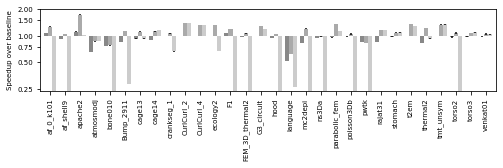

baseline mean runtime: 1.675634116913437
singleprec mean runtime: 1.6814484045373423
singleprec mean speedup: 0.9239286075249864
mixed mean runtime: 1.1178143743861144
mixed mean speedup: 1.4990271688299484
single mean runtime: 0.804128829030456
single mean speedup: 1.2326954842624651
(0.3657772365349362, 2.7777323181189213) ticked w/ [0.5, 0.75, 1.0, 1.5, 2.0, 3.0]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


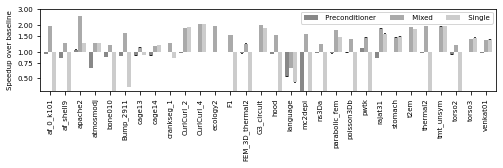

In [522]:
timings_restartsmart_mgs_jacobi = {
'af_0_k101': [(40.52326609, 40.54007454, 40.58973652, 182, 18200, '100', '1e-10', '0'), (31.85591454, 32.00462334, 32.03541027, 198, 19800, '100', 'R1e-06', '0'), (37.8589361, 37.87220597, 37.91183839999999, 168, 16800, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'af_shell9': [(46.85376779, 46.938441700000006, 47.04700715, 210, 21000, '100', 'R1e-06', '0'), (44.67673687, 44.691828179999995, 44.70702049, 276, 27600, '100', 'R1e-06', '0'), (51.22336497, 51.25059398, 51.47364007, 227, 22700, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'apache2': [(32.076720522, 32.118661801, 32.147710699, 117, 11700, '100', '0', '0'), (18.42145787, 18.43656735, 18.51497693, 98, 9800, '100', 'R1e-06', '0'), (28.715514092, 28.77924647, 28.806371165999998, 104, 10400, '100', '0', '0'), (31.35402375, 31.35604607, 31.4081881, 167, 16700, '100', '0', '0')],
'atmosmodj': [(0.86274177, 0.86448564, 0.86489799, 2, 200, '100', '1e-10', '0'), (1.00076548, 1.00188015, 1.00277298, 3, 300, '100', 'R1e-06', '0'), (1.30759948, 1.30802432, 1.30947023, 3, 300, '100', '0', '0'), (0.9970145, 0.99967047, 1.00111465, 3, 300, '100', '0', '0')],
'bone010': [(66.14311153999999, 66.18616873, 66.27727362, 146, 14600, '100', '1e-10', '0'), (85.15739230000001, 85.18766489999999, 85.3004686, 256, 25600, '100', 'R1e-06', '0'), (87.19052836, 87.26935206, 87.39086671999999, 191, 19100, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'Bump_2911': [(36.654308879999995, 36.65648803, 36.66769808, 35, 3500, '100', '1e-10', '0'), (31.991913099999998, 32.007579, 32.017897999999995, 41, 4100, '100', '0', '0'), (43.48982530000001, 43.4993858, 43.5320483, 41, 4100, '100', '0', '0'), (127.579679, 127.591573, 127.61753829999999, 164, 16400, '100', '1e-10', '0')],
'cage13': [(0.019470531, 0.019507775, 0.019731698, 2, 22, '100', 'R1e-06', '0'), (0.0174441, 0.0174852, 0.017533550000000002, 2, 22, '100', 'R1e-06', '0'), (0.021120319999999998, 0.02116633, 0.021229309999999998, 2, 22, '100', 'R1e-06', '0'), (0.020985010000000002, 0.02117443, 0.021231220000000002, 3, 33, '100', 'R1e-06', '0')],
'cage14': [(0.049386421, 0.049437020000000005, 0.04954345, 2, 22, '100', 'R1e-06', '0'), (0.0441068, 0.04413508, 0.04419115, 2, 22, '100', 'R1e-06', '0'), (0.05479339, 0.05486501, 0.055097179999999996, 2, 22, '100', 'R1e-06', '0'), (0.04275944, 0.042760019999999996, 0.04281978, 2, 22, '100', 'R1e-06', '0')],
'crankseg_1': [(0.7266825330000001, 0.7282788689999999, 0.7293692660000001, 8, 800, '100', '1e-10', '0'), (0.67149537, 0.6727903199999999, 0.6881977699999999, 8, 800, '100', '0', '0'), (0.73312028, 0.7359424499999999, 0.73983597, 8, 800, '100', '1e-10', '0'), (1.08491196, 1.08607183, 1.1037119599999998, 13, 1300, '100', '1e-10', '0')],
'CurlCurl_2': [(4.598307566, 4.603158614, 4.6108558319999995, 15, 1500, '100', '1e-10', '0'), (3.30841686, 3.31925138, 3.33095227, 15, 1500, '100', '0', '0'), (4.65330419, 4.66062758, 4.6718126799999995, 15, 1500, '100', '0', '0'), (3.2980641599999996, 3.3002734300000003, 3.30620774, 15, 1500, '100', '1e-10', '0')],
'CurlCurl_4': [(13.910086695, 13.924481831000001, 13.928761119999999, 19, 1900, '100', 'R1e-06', '0'), (10.49773319, 10.50003704, 10.51014788, 19, 1900, '100', 'R1e-06', '0'), (14.11640028, 14.12412649, 14.12899778, 19, 1900, '100', '0', '0'), (10.44724143, 10.45619258, 10.466473209999998, 19, 1900, '100', '0', '0')],
'ecology2': [(2.809438257, 2.811756703, 2.817523676, 8, 800, '100', '1e-10', '0'), (2.12803074, 2.12804851, 2.13202259, 8, 800, '100', 'R1e-06', '0'), (2.845784628, 2.8546115, 2.854962165, 8, 800, '100', '0', '0'), (4.21202572, 4.21307826, 4.223829230000001, 16, 1600, '100', 'R1e-06', '0')],
'F1': [(6.4699332499999995, 6.47777389, 6.48882545, 36, 3600, '100', '1e-10', '0'), (5.463089549999999, 5.485669, 5.48949082, 36, 3600, '100', 'R1e-06', '0'), (6.016891920000001, 6.02428914, 6.03724885, 33, 3300, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'FEM_3D_thermal2': [(0.032189039, 0.032207680999999995, 0.032250139, 2, 60, '100', 'R1e-06', '0'), (0.03020065, 0.03030294, 0.03045735, 2, 60, '100', 'R1e-06', '0'), (0.033246038, 0.03336481, 0.03355044, 2, 60, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'G3_circuit': [(5.5400150660000005, 5.540916945, 5.547704973, 11, 1100, '100', 'R1e-06', '0'), (4.279752439999999, 4.2821612799999995, 4.28702821, 11, 1100, '100', 'R1e-06', '0'), (5.61209557, 5.6229705899999995, 5.62343064, 11, 1100, '100', '0', '0'), (4.64740721, 4.6479009399999995, 4.64922608, 12, 1200, '100', '0', '0')],
'hood': [(4.874343822, 4.883994158999999, 4.894056544, 39, 3900, '100', 'R1e-06', '0'), (4.649333240000001, 4.6539195200000005, 4.65979028, 41, 4100, '100', 'R1e-06', '0'), (5.16192056, 5.1624967900000005, 5.20503544, 41, 4100, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'language': [(0.062184577, 0.062241543, 0.062267722, 1, 29, '100', 'R1e-06', '0'), (0.10068459, 0.10074499, 0.10076210000000001, 2, 58, '100', 'R1e-06', '0'), (0.11936871, 0.11946932, 0.11954737, 2, 58, '100', 'R1e-06', '0'), (0.23487754, 0.23577673999999998, 0.23608768, 5, 145, '100', 'R1e-06', '0')],
'mc2depi': [(22.595756177000002, 22.599254376, 22.674623328, 110, 11000, '100', '1e-10', '0'), (18.68019981, 18.701212435, 18.807011344, 126, 12600, '100', '0', '0'), (27.385838384000003, 27.413169768000003, 27.472606438000003, 132, 13200, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'ns3Da': [(10.826211731999999, 10.865410373, 10.897647996, 143, 14300, '100', '0', '0'), (11.015347691, 11.092768032999999, 11.11756799, 150, 15000, '100', 'R1e-06', '0'), (11.536287691, 11.54315038, 11.579385399, 148, 14800, '100', '1e-10', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'parabolic_fem': [(7.547392851000001, 7.549259254, 7.5736214969999995, 36, 3600, '100', '1e-10', '0'), (5.579029510000001, 5.584889820000001, 5.60175611, 37, 3700, '100', 'R1e-06', '0'), (7.8650841300000005, 7.86857937, 7.89870171, 37, 3700, '100', '1e-10', '0'), (6.63864404, 6.64004903, 6.64739308, 44, 4400, '100', 'R1e-06', '0')],
'poisson3Db': [(0.332719722, 0.339387939, 0.342210109, 4, 400, '100', '1e-10', '0'), (0.32089021, 0.321783414, 0.323433829, 4, 400, '100', 'R1e-06', '0'), (0.34275069999999996, 0.34442705, 0.34469225800000003, 4, 400, '100', '1e-10', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'pwtk': [(16.902163349, 16.903684805999998, 16.96429577, 135, 13500, '100', '0', '0'), (20.24012435, 20.26532874, 20.34920524, 177, 17700, '100', '0', '0'), (19.760472160000003, 19.8270114, 19.850715790000002, 157, 15700, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'rajat31': [(7.78427697, 7.78596595, 7.7898555400000005, 6, 600, '100', '0', '0'), (6.73613008, 6.7378004, 6.74572633, 7, 700, '100', 'R1e-06', '0'), (9.22381197, 9.22492964, 9.22660554, 7, 700, '100', '0', '0'), (6.7308997999999995, 6.732378639999999, 6.734675670000001, 7, 700, '100', '0', '0')],
'stomach': [(0.115161114, 0.115786498, 0.116066715, 2, 130, '100', 'R1e-06', '0'), (0.10625431399999999, 0.106939124, 0.107212342, 2, 130, '100', 'R1e-06', '0'), (0.117716381, 0.118434947, 0.119192899, 2, 130, '100', 'R1e-06', '0'), (0.10458554, 0.10548890000000001, 0.10574365999999999, 2, 130, '100', 'R1e-06', '0')],
't2em': [(15.763258861, 15.780166848, 15.804020191, 48, 4800, '100', 'R1e-06', '0'), (11.60994593, 11.62037269, 11.659780529999999, 48, 4800, '100', 'R1e-06', '0'), (15.979064403999999, 16.017941469, 16.020149669000002, 48, 4800, '100', '0', '0'), (12.29039406, 12.30776376, 12.31973219, 51, 5100, '100', '1e-10', '0')],
'thermal2': [(88.70740710999999, 88.81961206, 88.95271962, 214, 21400, '100', 'R1e-06', '0'), (72.83223688000001, 72.85832301, 72.89769792, 227, 22700, '100', 'R1e-06', '0'), (107.00793849, 107.02994695000001, 107.21592816, 254, 25400, '100', '1e-10', '0'), (95.45706035, 95.50265599, 95.70341469, 298, 29800, '100', 'R1e-06', '0')],
'tmt_unsym': [(1.652426264, 1.652839196, 1.65551259, 5, 500, '100', '1e-10', '0'), (1.2333994, 1.2338326800000001, 1.2371159900000002, 5, 500, '100', 'R1e-06', '0'), (1.675964031, 1.677832222, 1.680290413, 5, 500, '100', '0', '0'), (1.22868151, 1.22982716, 1.23146707, 5, 500, '100', 'R1e-06', '0')],
'torso2': [(0.024792849000000002, 0.025199152, 0.025233967, 2, 56, '100', 'R1e-06', '0'), (0.023156474, 0.023435527, 0.023741242, 2, 56, '100', 'R1e-06', '0'), (0.025699453, 0.025792236, 0.02593728, 2, 56, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'torso3': [(0.13161614, 0.13275509900000002, 0.132807057, 2, 134, '100', 'R1e-06', '0'), (0.12252392, 0.12268292, 0.12389009, 2, 134, '100', 'R1e-06', '0'), (0.134944949, 0.136009511, 0.136137558, 1, 100, '100', '0', '0'), (0.12043461000000001, 0.12071609, 0.12086412, 2, 134, '100', 'R1e-06', '0')],
'venkat01': [(0.072804858, 0.073223228, 0.073395595, 1, 96, '100', 'R1e-06', '0'), (0.06897868900000001, 0.069455664, 0.071082578, 1, 96, '100', 'R1e-06', '0'), (0.07367027500000001, 0.07419290099999999, 0.07450750099999999, 1, 96, '100', 'R1e-06', '0'), (0.069274712, 0.069389332, 0.070748427, 1, 96, '100', 'R1e-06', '0')],
}

# plot_times([timings_restartsmart_mgs_jacobi],
#            [''],
#            'time-rlen=smart-gpu-jacobi-mgs', save=True,
#            added_modifications=(lambda: plt.ylim(0.0, 2.2)))

plot_speedups([timings_restartsmart_mgs_jacobi],
              [''],
              'speedup-rlen=smart-gpu-jacobi-mgs', save=True,
              yticks=[0.25, 0.5, 0.75, 1.0, 1.5, 2.0])

timings_restartsmart_cgsr_jacobi = {
'af_0_k101': [(23.62085575, 23.62298556, 23.633791839999997, 143, 14300, '100', 'R1e-06', '0'), (12.116820090000001, 12.12920972, 12.13741554, 127, 12700, '100', 'R1e-06', '0'), (25.03100703, 25.03384066, 25.03995417, 149, 14900, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'af_shell9': [(33.74646091, 33.76085704, 33.7721176, 205, 20500, '100', 'R1e-06', '0'), (26.776502479999998, 26.781517769999997, 26.785015570000002, 284, 28400, '100', 'R1e-06', '0'), (39.588262570000005, 39.59722928, 39.60460097, 236, 23600, '100', '1e-10', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'apache2': [(22.932975127000002, 22.948939787, 22.963548927, 117, 11700, '100', '1e-10', '0'), (9.06504884, 9.06660144, 9.069281120000001, 85, 8500, '100', '0', '0'), (21.742460026, 21.743758452999998, 21.75371768, 109, 10900, '100', '0', '0'), (18.15998155, 18.16217966, 18.172858910000002, 172, 17200, '100', '0', '0')],
'atmosmodj': [(0.67953397, 0.68052218, 0.68075364, 2, 200, '100', 'R1e-06', '0'), (0.53993911, 0.5401802600000001, 0.5405125900000001, 3, 300, '100', 'R1e-06', '0'), (1.03170422, 1.0319086, 1.031988, 3, 300, '100', '0', '0'), (0.53964054, 0.53977767, 0.5399568600000001, 3, 300, '100', '1e-10', '0')],
'bone010': [(70.91787667999999, 70.93016402, 70.95101805, 190, 19000, '100', '0', '0'), (59.0303296, 59.0327881, 59.071692899999995, 282, 28200, '100', 'R1e-06', '0'), (81.80709985, 81.82237031, 81.84506547999999, 215, 21500, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'Bump_2911': [(35.15024449, 35.153120449999996, 35.15429211, 35, 3500, '100', '1e-10', '0'), (21.7671257, 21.7702044, 21.772301799999997, 41, 4100, '100', 'R1e-06', '0'), (39.400942300000004, 39.405174699999996, 39.4075184, 39, 3900, '100', '0', '0'), (87.6370122, 87.6447033, 87.6620268, 166, 16600, '100', '0', '0')],
'cage13': [(0.018994750999999997, 0.019020811, 0.019037983, 1, 19, '100', '1e-10', '0'), (0.01705804, 0.01708096, 0.01735851, 2, 22, '100', 'R1e-06', '0'), (0.02105795, 0.02109121, 0.02134917, 2, 22, '100', 'R1e-06', '0'), (0.020584579999999998, 0.02068671, 0.02069242, 3, 33, '100', 'R1e-06', '0')],
'cage14': [(0.0503419, 0.05037741, 0.050471735000000004, 2, 22, '100', 'R1e-06', '0'), (0.04375164, 0.04380796, 0.04410288, 2, 22, '100', 'R1e-06', '0'), (0.05545911, 0.055802990000000004, 0.0559342, 1, 19, '100', '1e-10', '0'), (0.04248926, 0.04257536, 0.04257636, 2, 22, '100', 'R1e-06', '0')],
'crankseg_1': [(0.42473807700000005, 0.424818785, 0.424878661, 8, 800, '100', '1e-10', '0'), (0.34073338999999997, 0.3409536, 0.34184451000000005, 8, 800, '100', '0', '0'), (0.43164691, 0.43175171, 0.43237292, 8, 800, '100', '1e-10', '0'), (0.50342041, 0.50527928, 0.50556632, 12, 1200, '100', '0', '0')],
'CurlCurl_2': [(3.414462472, 3.41529718, 3.4168909259999998, 15, 1500, '100', '0', '0'), (1.83114041, 1.83185478, 1.8333053000000001, 15, 1500, '100', '0', '0'), (3.49734811, 3.49836569, 3.4988696200000002, 15, 1500, '100', '0', '0'), (1.81617239, 1.8164941399999999, 1.81721827, 15, 1500, '100', '0', '0')],
'CurlCurl_4': [(12.647791724000001, 12.65255477, 12.652795039999999, 19, 1900, '100', '0', '0'), (6.2512908000000005, 6.25449575, 6.2557162, 19, 1900, '100', 'R1e-06', '0'), (12.859307130000001, 12.86063285, 12.86441719, 19, 1900, '100', '0', '0'), (6.2307844, 6.2309654100000005, 6.231111469999999, 19, 1900, '100', 'R1e-06', '0')],
'ecology2': [(2.176408565, 2.177501413, 2.178334527, 8, 800, '100', '0', '0'), (1.12128914, 1.12260658, 1.12327936, 8, 800, '100', 'R1e-06', '0'), (2.20934912, 2.210785806, 2.21191451, 8, 800, '100', '0', '0'), (2.21289736, 2.2129812199999996, 2.21304562, 16, 1600, '100', '1e-10', '0')],
'F1': [(5.24208131, 5.24317399, 5.24761204, 36, 3600, '100', 'R1e-06', '0'), (3.42802871, 3.43212385, 3.43268363, 38, 3800, '100', 'R1e-06', '0'), (5.311708070000001, 5.32010507, 5.32036923, 36, 3600, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'FEM_3D_thermal2': [(0.02540475, 0.025530710999999998, 0.02573971, 2, 60, '100', 'R1e-06', '0'), (0.02071723, 0.02075726, 0.0208427, 2, 60, '100', 'R1e-06', '0'), (0.026643205, 0.026758552, 0.02680703, 2, 60, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'G3_circuit': [(4.765053888000001, 4.765514335000001, 4.768089316, 11, 1100, '100', 'R1e-06', '0'), (2.3928843300000002, 2.3935036700000003, 2.3946182499999997, 11, 1100, '100', 'R1e-06', '0'), (4.82999673, 4.83276109, 4.83774974, 11, 1100, '100', '0', '0'), (2.59632727, 2.5970768, 2.59883364, 12, 1200, '100', 'R1e-06', '0')],
'hood': [(3.445199746, 3.449161453, 3.451605748, 39, 3900, '100', '1e-10', '0'), (2.22857801, 2.23134177, 2.23786062, 40, 4000, '100', '0', '0'), (3.65356463, 3.65458501, 3.6584003, 41, 4100, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'language': [(0.059551237, 0.059618852, 0.059810859, 1, 29, '100', 'R1e-06', '0'), (0.09156967, 0.09164157, 0.09196491999999999, 2, 58, '100', 'R1e-06', '0'), (0.1138991, 0.1140368, 0.11404752, 2, 58, '100', 'R1e-06', '0'), (0.13209627, 0.13278993, 0.13288714000000001, 3, 87, '100', 'R1e-06', '0')],
'mc2depi': [(15.02637084, 15.032769335000001, 15.044039251, 106, 10600, '100', '0', '0'), (9.605722952, 9.607327217, 9.607675674, 122, 12200, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'ns3Da': [(3.485550712, 3.502441816, 3.508234215, 144, 14400, '100', 'R1e-06', '0'), (2.847980077, 2.850158269, 2.853642425, 149, 14900, '100', 'R1e-06', '0'), (3.6261690399999997, 3.633989671, 3.635566267, 146, 14600, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'parabolic_fem': [(5.243380339, 5.244749088, 5.251273379000001, 36, 3600, '100', '1e-10', '0'), (3.0066371, 3.00689059, 3.0091960099999997, 37, 3700, '100', 'R1e-06', '0'), (5.50203007, 5.50653613, 5.5087695000000005, 37, 3700, '100', '0', '0'), (3.5643810400000002, 3.56660506, 3.5684578399999998, 44, 4400, '100', 'R1e-06', '0')],
'poisson3Db': [(0.175279891, 0.175397402, 0.175511488, 4, 400, '100', 'R1e-06', '0'), (0.125505823, 0.12625879499999998, 0.126273016, 4, 400, '100', 'R1e-06', '0'), (0.179509875, 0.180000422, 0.18008648000000002, 4, 400, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'pwtk': [(16.533380993999998, 16.549883651, 16.561494927000002, 184, 18400, '100', '0', '0'), (11.43203536, 11.44062904, 11.47262445, 202, 20200, '100', 'R1e-06', '0'), (15.02785064, 15.035268270000001, 15.03758684, 166, 16600, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'rajat31': [(7.7044080600000004, 7.70587097, 7.712964533, 6, 600, '100', 'R1e-06', '0'), (4.23304275, 4.23305332, 4.23334513, 7, 700, '100', 'R1e-06', '0'), (9.14027252, 9.14244618, 9.1464211, 7, 700, '100', '1e-10', '0'), (4.819863270000001, 4.82019367, 4.82283448, 8, 800, '100', '1e-10', '0')],
'stomach': [(0.07721330100000001, 0.077226117, 0.07723605800000001, 1, 100, '100', '0', '0'), (0.053428428, 0.053461918, 0.053575746, 2, 130, '100', 'R1e-06', '0'), (0.078440176, 0.078564797, 0.078644254, 1, 100, '100', '0', '0'), (0.051997890000000005, 0.052155929999999996, 0.05231975, 2, 130, '100', 'R1e-06', '0')],
't2em': [(11.663656289, 11.664512084, 11.670430619, 48, 4800, '100', '1e-10', '0'), (6.14207355, 6.1462819500000005, 6.1495378, 48, 4800, '100', 'R1e-06', '0'), (11.82866226, 11.831290139999998, 11.831718054, 48, 4800, '100', '0', '0'), (6.49683833, 6.49794833, 6.49926039, 51, 5100, '100', 'R1e-06', '0')],
'thermal2': [(84.04769548, 84.07871566, 84.08060625, 253, 25300, '100', '0', '0'), (43.70222659, 43.712160450000006, 43.72943818, 255, 25500, '100', 'R1e-06', '0'), (86.28885358000001, 86.30856407, 86.31817631999999, 255, 25500, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'tmt_unsym': [(1.253180837, 1.253365152, 1.253610121, 5, 500, '100', '1e-10', '0'), (0.6527814, 0.65311437, 0.65388064, 5, 500, '100', 'R1e-06', '0'), (1.275717703, 1.275886524, 1.2759551919999998, 5, 500, '100', '0', '0'), (0.64756576, 0.64786867, 0.6482331, 5, 500, '100', '0', '0')],
'torso2': [(0.018466373999999997, 0.018545816000000003, 0.018628979, 1, 47, '100', '1e-10', '0'), (0.015510458000000001, 0.015536771, 0.015751992, 2, 56, '100', 'R1e-06', '0'), (0.020016080000000002, 0.020142105, 0.020202480999999998, 2, 56, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'torso3': [(0.090113197, 0.090200998, 0.090266043, 1, 100, '100', '0', '0'), (0.06433567000000001, 0.06441704, 0.06459636, 2, 134, '100', 'R1e-06', '0'), (0.091775969, 0.091947319, 0.092014837, 1, 100, '100', '0', '0'), (0.062461779999999995, 0.06276549, 0.06283396, 2, 134, '100', 'R1e-06', '0')],
'venkat01': [(0.034573638000000004, 0.034713928, 0.034826479, 1, 96, '100', 'R1e-06', '0'), (0.025468858, 0.025551844, 0.025619716, 1, 96, '100', 'R1e-06', '0'), (0.035805737, 0.035943604999999997, 0.03616334, 1, 96, '100', 'R1e-06', '0'), (0.025243567999999997, 0.025254990999999997, 0.02549367, 1, 96, '100', 'R1e-06', '0')],
}

# plot_times([timings_restartsmart_cgsr_jacobi],
#            [''],
#            'time-rlen=smart-gpu-jacobi-cgsr', save=True,
#            added_modifications=(lambda: plt.ylim(0.0, 2.2)))

plot_speedups([timings_restartsmart_cgsr_jacobi],
              [''],
              'speedup-rlen=smart-gpu-jacobi-cgsr', save=True,
              yticks=[0.5, 0.75, 1.0, 1.5, 2.0, 3.0],
              added_modifications=(lambda: plt.legend(ncol=3, loc='upper right', bbox_to_anchor=(1, 1.01))))

# plot_times([timings_restartsmart_mgs_jacobi, timings_restartsmart_cgsr_jacobi],
#            ['MGS', 'CGSR'],
#            'time-rlen=smart-gpu-jacobi', save=False)


# ILU Preconditioner

baseline mean runtime: 4.1936199892262245
singleprec mean runtime: 4.55950687317481
singleprec mean speedup: 0.9197529701948193
mixed mean runtime: 4.602273844371343
mixed mean speedup: 0.9112060974718161
single mean runtime: 5.979495138620713
single mean speedup: 0.7939770331726299
(0.4285083749633237, 1.3010596301317363) ticked w/ [0.5, 0.75, 1.0, 1.5, 2.0]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


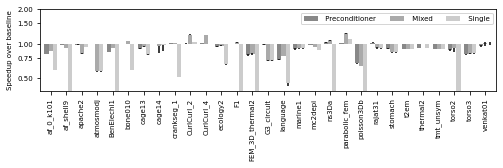

baseline mean runtime: 4.036256459378198
singleprec mean runtime: 4.426244787043416
singleprec mean speedup: 0.9118918301114304
mixed mean runtime: 4.317518882112314
mixed mean speedup: 0.9348555430992095
single mean runtime: 5.74703673270881
single mean speedup: 0.7988663926666396
(0.2640429564686115, 1.555069344240861) ticked w/ [0.25, 0.5, 0.75, 1.0, 1.5, 2.0]


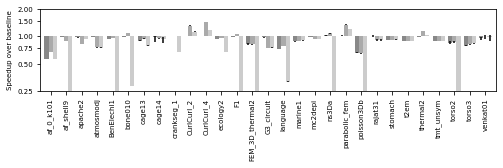

In [523]:
timings_restartsmart_mgs_ilu = {
'af_0_k101': [(202.904211, 202.912948, 202.970918, 45, 4500, '100', '1e-10', '0'), (234.05710399999998, 234.109218, 234.11121300000002, 52, 5200, '100', 'R1e-06', '0'), (251.17344500000002, 251.177152, 251.208734, 55, 5500, '100', '1e-10', '0'), (346.495047, 346.515329, 346.598745, 77, 7700, '100', '1e-10', '0')],
'af_shell9': [(53.768621, 53.791189, 53.818173, 22, 2200, '100', '1e-10', '0'), (58.233695, 58.261348, 58.279433, 24, 2400, '100', 'R1e-06', '0'), (54.839245, 54.848782, 54.900907000000004, 22, 2200, '100', '1e-10', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'apache2': [(5.463714, 5.468186, 5.492078, 6, 600, '100', '0', '0'), (6.697792, 6.706406, 6.718375999999999, 8, 800, '100', 'R1e-06', '0'), (5.576325, 5.581932, 5.583371, 6, 600, '100', '0', '0'), (5.874008, 5.893956, 5.8974530000000005, 7, 700, '100', '0', '0')],
'atmosmodj': [(1.086478, 1.0952709999999999, 1.095615, 1, 82, '100', 'R1e-06', '0'), (1.89798, 1.9010150000000001, 1.91049, 2, 200, '100', 'R1e-06', '0'), (1.099542, 1.104099, 1.1057489999999999, 1, 82, '100', 'R1e-06', '0'), (1.909783, 1.909821, 1.917278, 2, 200, '100', '1e-10', '0')],
'BenElechi1': [(174.9298998, 174.9333053, 174.9485462, 39, 3900, '100', 'R1e-06', '0'), (189.8176213, 189.831571, 189.8653902, 42, 4200, '100', 'R1e-06', '0'), (208.499169, 208.5007029, 208.5253986, 46, 4600, '100', '1e-10', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'bone010': [(22.097916, 22.098683, 22.101987, 12, 1200, '100', 'R1e-06', '0'), (20.766759999999998, 20.782183, 20.788376, 12, 1200, '100', 'R1e-06', '0'), (22.375977, 22.380505, 22.383729000000002, 12, 1200, '100', 'R1e-06', '0'), (37.590331, 37.601324, 37.607805000000006, 22, 2200, '100', '1e-10', '0')],
'cage13': [(0.0346321, 0.0347467, 0.0348514, 1, 7, '100', '1e-10', '0'), (0.0368254, 0.0368646, 0.0368823, 2, 8, '100', 'R1e-06', '0'), (0.0382776, 0.0383567, 0.0383795, 2, 8, '100', 'R1e-06', '0'), (0.0432372, 0.0433593, 0.0433877, 3, 12, '100', 'R1e-06', '0')],
'cage14': [(0.100549, 0.100879, 0.1009761, 1, 7, '100', '1e-10', '0'), (0.105516, 0.1056893, 0.1205059, 2, 8, '100', 'R1e-06', '0'), (0.1007396, 0.1008382, 0.1009352, 1, 7, '100', '1e-10', '0'), (0.1037427, 0.10377639999999999, 0.11585200000000001, 2, 8, '100', 'R1e-06', '0')],
'crankseg_1': [(7.0590312, 7.0730388, 7.0792406, 2, 200, '100', '0', '0'), (6.9848506, 6.9983005, 7.0128585, 2, 200, '100', '0', '0'), (6.9956448, 7.0003161, 7.0120166, 2, 200, '100', '1e-10', '0'), (13.8354278, 13.8377187, 13.8480506, 4, 400, '100', '0', '0')],
'CurlCurl_2': [(3.331231, 3.3413739999999996, 3.35098, 6, 600, '100', '1e-10', '0'), (2.770178, 2.7828869999999997, 2.80359, 6, 600, '100', 'R1e-06', '0'), (3.32467, 3.3335749999999997, 3.335277, 6, 600, '100', '1e-10', '0'), (3.2338080000000002, 3.238015, 3.250965, 7, 700, '100', '1e-10', '0')],
'CurlCurl_4': [(17.544508, 17.545244, 17.548774, 14, 1400, '100', 'R1e-06', '0'), (14.672098, 14.678808, 14.679642, 14, 1400, '100', 'R1e-06', '0'), (17.408013, 17.412452, 17.421237, 14, 1400, '100', 'R1e-06', '0'), (17.700707, 17.720803999999998, 17.733747, 17, 1700, '100', 'R1e-06', '0')],
'ecology2': [(8.026987, 8.058347, 8.090064, 2, 200, '100', '1e-10', '0'), (8.37503, 8.389053, 8.435225, 2, 200, '100', 'R1e-06', '0'), (8.542841, 8.550703, 8.553987, 2, 200, '100', '0', '0'), (12.205827000000001, 12.214067, 12.270749, 3, 300, '100', '0', '0')],
'F1': [(9.0198619, 9.0225777, 9.0312328, 10, 1000, '100', '1e-10', '0'), (8.8058279, 8.8181056, 8.8246042, 10, 1000, '100', 'R1e-06', '0'), (9.0985815, 9.1001062, 9.1016548, 10, 1000, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'FEM_3D_thermal2': [(0.6768430000000001, 0.6808088, 0.6908409999999999, 1, 10, '100', '1e-10', '0'), (0.8409363, 0.8430689, 0.8572386000000001, 2, 12, '100', 'R1e-06', '0'), (0.8495645000000001, 0.8510279, 0.863492, 2, 12, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'G3_circuit': [(4.327128, 4.336665, 4.344379999999999, 2, 200, '100', 'R1e-06', '0'), (6.076554, 6.114402, 6.142287, 3, 300, '100', 'R1e-06', '0'), (4.407871999999999, 4.417593, 4.442432999999999, 2, 200, '100', '0', '0'), (6.089826, 6.106058, 6.11931, 3, 300, '100', '1e-10', '0')],
'language': [(0.04263165, 0.04264588, 0.04274788, 1, 9, '100', '1e-10', '0'), (0.05486378, 0.054897619999999994, 0.05497687, 2, 14, '100', 'R1e-06', '0'), (0.058808990000000005, 0.05898479, 0.05908275, 2, 14, '100', 'R1e-06', '0'), (0.09447727, 0.09462226, 0.0995265, 4, 28, '100', 'R1e-06', '0')],
'marine1': [(11.386439, 11.431564999999999, 11.436323999999999, 3, 300, '100', 'R1e-06', '0'), (12.461367, 12.599677, 12.750743, 3, 300, '100', 'R1e-06', '0'), (12.615409000000001, 12.647753, 12.850659, 3, 300, '100', '1e-10', '0'), (12.471214999999999, 12.51766, 12.623249999999999, 3, 300, '100', 'R1e-06', '0')],
'mc2depi': [(74.3260018, 74.3894411, 74.3962354, 17, 1700, '100', 'R1e-06', '0'), (79.7555684, 79.7590975, 79.9635171, 17, 1700, '100', '0', '0'), (75.9356892, 75.9590498, 76.00319780000001, 16, 1600, '100', '1e-10', '0'), (84.3114848, 84.4076073, 84.6059284, 18, 1800, '100', '1e-10', '0')],
'ns3Da': [(1.0107428999999999, 1.0149228000000001, 1.021565, 2, 200, '100', '1e-10', '0'), (0.952377, 0.9526464, 0.9534556000000001, 2, 200, '100', 'R1e-06', '0'), (0.9794347000000001, 0.9893526, 0.9899960999999999, 2, 200, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'parabolic_fem': [(2.58377911, 2.59955342, 2.61731808, 8, 800, '100', 'R1e-06', '0'), (2.11584453, 2.1169967400000003, 2.11811497, 8, 800, '100', 'R1e-06', '0'), (2.56985584, 2.5734054000000004, 2.57359961, 8, 800, '100', 'R1e-06', '0'), (2.36787837, 2.37026357, 2.3753583099999998, 9, 900, '100', '1e-10', '0')],
'poisson3Db': [(0.18224748999999998, 0.18324143, 0.18395786, 1, 100, '100', '0', '0'), (0.2872482, 0.28755644999999996, 0.28836718, 2, 174, '100', 'R1e-06', '0'), (0.2701348, 0.27164272, 0.27311318, 2, 174, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'rajat31': [(1.051637, 1.0527739999999999, 1.061452, 1, 10, '100', '1e-10', '0'), (1.147093, 1.156482, 1.1635469999999999, 2, 18, '100', 'R1e-06', '0'), (1.035879, 1.0390169999999999, 1.041325, 1, 9, '100', 'R1e-06', '0'), (1.155019, 1.158918, 1.162147, 2, 18, '100', 'R1e-06', '0')],
'stomach': [(0.4246407, 0.4294472, 0.4316352, 1, 17, '100', '1e-10', '0'), (0.5118365, 0.5120178, 0.5162044, 2, 20, '100', 'R1e-06', '0'), (0.4739091, 0.4749442, 0.4778174, 2, 18, '100', 'R1e-06', '0'), (0.5090636, 0.510986, 0.5118532, 2, 20, '100', 'R1e-06', '0')],
't2em': [(2803.31284, 2803.41122, 2806.16842, 6, 600, '100', '0', '0'), (3150.2371399999997, 3150.60888, 3150.83254, 6, 600, '100', '0', '0'), (3145.97324, 3146.6371599999998, 3149.05642, 6, 600, '100', '0', '0'), (3151.37468, 3151.55007, 3155.60692, 6, 600, '100', '1e-10', '0')],
'thermal2': [(53.5333941, 53.5570051, 53.565102800000005, 48, 4800, '100', 'R1e-06', '0'), (53.9534231, 53.9571926, 53.9843674, 52, 5200, '100', 'R1e-06', '0'), (58.0282195, 58.064192299999995, 58.0701368, 51, 5100, '100', '1e-10', '0'), (58.891060599999996, 58.9520813, 58.974413999999996, 57, 5700, '100', '1e-10', '0')],
'tmt_unsym': [(958.45709, 960.25744, 975.45093, 2, 200, '100', '0', '0'), (1076.91245, 1077.24764, 1077.61159, 2, 200, '100', '0', '0'), (1077.68436, 1078.08475, 1078.6281, 2, 200, '100', '0', '0'), (1077.08968, 1077.39113, 1077.76699, 2, 200, '100', 'R1e-06', '0')],
'torso2': [(0.134428, 0.13845000000000002, 0.1391753, 1, 11, '100', '1e-10', '0'), (0.15115879999999998, 0.1511707, 0.1582471, 2, 12, '100', 'R1e-06', '0'), (0.1546804, 0.1560997, 0.1563883, 2, 12, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'torso3': [(0.123437, 0.12401419999999999, 0.124741, 1, 35, '100', '1e-10', '0'), (0.1510657, 0.15208080000000002, 0.1521459, 2, 48, '100', 'R1e-06', '0'), (0.1539403, 0.154088, 0.1548096, 2, 48, '100', 'R1e-06', '0'), (0.1494112, 0.1512058, 0.1516358, 2, 48, '100', 'R1e-06', '0')],
'venkat01': [(0.7276864, 0.7337471, 0.7420914, 1, 12, '100', 'R1e-06', '0'), (0.7136808, 0.7243507, 0.7693729, 1, 12, '100', 'R1e-06', '0'), (0.7562274, 0.7693694999999999, 0.7812964, 1, 12, '100', 'R1e-06', '0'), (0.7190383, 0.7354341, 0.7491158, 1, 12, '100', 'R1e-06', '0')],
}

# plot_times([timings_restartsmart_mgs_ilu],
#            [''],
#            'time-rlen=smart-gpu-ilu-mgs', save=True,
#            added_modifications=(lambda: plt.ylim(0.0, 2.6)),
#            skip_single_prec = skip_single_prec)

plot_speedups([timings_restartsmart_mgs_ilu],
              [''],
              'speedup-rlen=smart-gpu-ilu-mgs', save=True,
              yticks=[0.5, 0.75, 1.0, 1.5, 2.0],
              added_modifications=(lambda: plt.legend(ncol=3, loc='upper right')))

timings_restartsmart_cgsr_ilu = {
'af_0_k101': [(195.894225, 195.946979, 195.978161, 44, 4400, '100', 'R1e-06', '0'), (292.666247, 292.685548, 292.69570400000003, 66, 6600, '100', 'R1e-06', '0'), (347.127069, 347.183389, 347.18926600000003, 77, 7700, '100', '0', '0'), (345.91107900000003, 345.914647, 345.942669, 78, 7800, '100', '1e-10', '0')],
'af_shell9': [(52.540729, 52.563946, 52.588606, 22, 2200, '100', '0', '0'), (58.992183, 58.99331, 58.99742500000001, 25, 2500, '100', 'R1e-06', '0'), (53.593143000000005, 53.60037, 53.60347, 22, 2200, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'apache2': [(5.0053, 5.01143, 5.014839, 6, 600, '100', 'R1e-06', '0'), (6.057789, 6.066475, 6.0670980000000005, 8, 800, '100', 'R1e-06', '0'), (5.135113, 5.135498999999999, 5.143538, 6, 600, '100', '0', '0'), (5.3357090000000005, 5.339362, 5.340377999999999, 7, 700, '100', '0', '0')],
'atmosmodj': [(1.037434, 1.038436, 1.0434869999999998, 1, 82, '100', 'R1e-06', '0'), (1.371185, 1.3725230000000002, 1.378795, 2, 164, '100', 'R1e-06', '0'), (1.046119, 1.046144, 1.0478420000000002, 1, 82, '100', 'R1e-06', '0'), (1.375361, 1.384312, 1.385149, 2, 164, '100', 'R1e-06', '0')],
'BenElechi1': [(191.3183248, 191.32601150000002, 191.34419830000002, 43, 4300, '100', '1e-10', '0'), (200.7665911, 200.77400889999998, 200.77492800000002, 45, 4500, '100', 'R1e-06', '0'), (202.36056530000002, 202.3664728, 202.3801138, 45, 4500, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'bone010': [(21.185673, 21.186472, 21.203843, 12, 1200, '100', '0', '0'), (19.322509, 19.326503, 19.331913, 12, 1200, '100', 'R1e-06', '0'), (21.47824, 21.486045, 21.490735, 12, 1200, '100', 'R1e-06', '0'), (74.018608, 74.025379, 74.028829, 47, 4700, '100', 'R1e-06', '0')],
'cage13': [(0.034699999999999995, 0.0347093, 0.035170400000000004, 1, 7, '100', '1e-10', '0'), (0.0369326, 0.0369341, 0.0370807, 2, 8, '100', 'R1e-06', '0'), (0.038473, 0.0385641, 0.038691, 2, 8, '100', 'R1e-06', '0'), (0.0436281, 0.0439107, 0.043951000000000004, 3, 12, '100', 'R1e-06', '0')],
'cage14': [(0.1009047, 0.1010212, 0.1017635, 1, 7, '100', '1e-10', '0'), (0.1060563, 0.1062841, 0.1063048, 2, 8, '100', 'R1e-06', '0'), (0.101292, 0.10156679999999998, 0.1158266, 1, 7, '100', '1e-10', '0'), (0.10425290000000001, 0.1073828, 0.1179248, 2, 8, '100', 'R1e-06', '0')],
'crankseg_1': [(6.9609717, 6.9615672, 6.9653591, 2, 200, '100', '1e-10', '0'), (6.895720600000001, 6.9050352, 6.906517600000001, 2, 200, '100', '0', '0'), (6.901764, 6.9144386, 6.9161352, 2, 200, '100', '1e-10', '0'), (10.2414658, 10.2517661, 10.2556921, 3, 300, '100', '0', '0')],
'CurlCurl_2': [(2.896205, 2.901745, 2.906499, 6, 600, '100', '1e-10', '0'), (2.189699, 2.2214050000000003, 2.224968, 6, 600, '100', 'R1e-06', '0'), (2.8870310000000003, 2.890035, 2.8904870000000003, 6, 600, '100', '1e-10', '0'), (2.547325, 2.558121, 2.564359, 7, 700, '100', '0', '0')],
'CurlCurl_4': [(16.709859, 16.725218, 16.736577, 14, 1400, '100', 'R1e-06', '0'), (11.665955, 11.671286, 11.681063, 14, 1400, '100', '0', '0'), (16.572532, 16.574259, 16.576972, 14, 1400, '100', 'R1e-06', '0'), (14.085943, 14.088583, 14.088903, 17, 1700, '100', '0', '0')],
'ecology2': [(7.893307, 7.903325, 7.903325000000001, 2, 200, '100', '1e-10', '0'), (8.137442, 8.142632, 8.145021, 2, 200, '100', 'R1e-06', '0'), (8.394466, 8.39697, 8.402008, 2, 200, '100', 'R1e-06', '0'), (11.814864, 11.826554, 11.842161999999998, 3, 300, '100', '0', '0')],
'F1': [(8.6976246, 8.700715, 8.7199967, 10, 1000, '100', '1e-10', '0'), (8.1857163, 8.202983799999998, 8.2050011, 10, 1000, '100', 'R1e-06', '0'), (8.773632399999999, 8.7763676, 8.779953599999999, 10, 1000, '100', '1e-10', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'FEM_3D_thermal2': [(0.6777103999999999, 0.695656, 0.6980107, 1, 10, '100', '1e-10', '0'), (0.8456751, 0.8457939999999999, 0.8502499, 2, 12, '100', 'R1e-06', '0'), (0.834237, 0.8404159, 0.8426247, 2, 12, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'G3_circuit': [(4.19479, 4.205892, 4.2247770000000004, 2, 200, '100', '1e-10', '0'), (5.6080950000000005, 5.609062, 5.635869, 3, 300, '100', 'R1e-06', '0'), (4.2801599999999995, 4.287229, 4.309537000000001, 2, 200, '100', '0', '0'), (5.594552, 5.602734, 5.612234, 3, 300, '100', '1e-10', '0')],
'language': [(0.042871799999999995, 0.04290684, 0.04297641, 1, 9, '100', '1e-10', '0'), (0.05499697, 0.05523622, 0.055268580000000005, 2, 14, '100', 'R1e-06', '0'), (0.0590413, 0.05912468, 0.05943432, 2, 14, '100', 'R1e-06', '0'), (0.13518346, 0.13530957, 0.13558251999999998, 6, 42, '100', 'R1e-06', '0')],
'marine1': [(11.202143, 11.208193999999999, 11.214542, 3, 300, '100', '1e-10', '0'), (12.444322, 12.451490999999999, 12.527491, 3, 300, '100', 'R1e-06', '0'), (12.479877, 12.484386, 12.784746, 3, 300, '100', '0', '0'), (12.354993, 12.388535, 12.463671, 3, 300, '100', '0', '0')],
'mc2depi': [(73.2121496, 73.2459628, 73.31637210000001, 17, 1700, '100', '1e-10', '0'), (78.5452928, 78.637852, 78.6512313, 17, 1700, '100', '0', '0'), (74.98766649999999, 75.036729, 75.0997168, 16, 1600, '100', 'R1e-06', '0'), (78.4936202, 78.498462, 78.7101923, 17, 1700, '100', '0', '0')],
'ns3Da': [(0.8951517, 0.9012844000000001, 0.9053151, 2, 200, '100', '1e-10', '0'), (0.8337875, 0.8346038, 0.8370702999999999, 2, 200, '100', 'R1e-06', '0'), (0.8732985, 0.8753296, 0.8759536, 2, 200, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'parabolic_fem': [(2.1170207100000002, 2.11827292, 2.13559892, 8, 800, '100', '1e-10', '0'), (1.56508316, 1.5664655, 1.58252633, 8, 800, '100', 'R1e-06', '0'), (2.0776317399999997, 2.08530822, 2.08829824, 8, 800, '100', '0', '0'), (1.7598821, 1.76369978, 1.7692961699999998, 9, 900, '100', '1e-10', '0')],
'poisson3Db': [(0.13922927999999998, 0.13968623, 0.14031842, 1, 100, '100', '1e-10', '0'), (0.21372718, 0.21477782, 0.21624111, 2, 174, '100', 'R1e-06', '0'), (0.21099721, 0.21134131, 0.21155556, 2, 174, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'rajat31': [(1.0482580000000001, 1.050103, 1.074633, 1, 10, '100', '1e-10', '0'), (1.1543160000000001, 1.161245, 1.170139, 2, 18, '100', 'R1e-06', '0'), (1.039479, 1.045766, 1.051298, 1, 9, '100', 'R1e-06', '0'), (1.148989, 1.1501700000000001, 1.166463, 2, 18, '100', 'R1e-06', '0')],
'stomach': [(0.4305682, 0.4317005, 0.4320188, 1, 17, '100', '1e-10', '0'), (0.471979, 0.4731454, 0.47448589999999996, 2, 18, '100', 'R1e-06', '0'), (0.4738407, 0.4753425, 0.4755886, 2, 18, '100', 'R1e-06', '0'), (0.4662298, 0.4693521, 0.4696573, 2, 18, '100', 'R1e-06', '0')],
't2em': [(2802.94502, 2803.46317, 2804.12952, 6, 600, '100', 'R1e-06', '0'), (3146.7305300000003, 3147.68401, 3148.70627, 6, 600, '100', 'R1e-06', '0'), (3146.625, 3147.0311, 3147.0999300000003, 6, 600, '100', '0', '0'), (3150.6198400000003, 3150.80526, 3153.80449, 6, 600, '100', '0', '0')],
'thermal2': [(52.8364221, 52.8655598, 52.8687603, 51, 5100, '100', '1e-10', '0'), (45.4455222, 45.4615203, 45.5479584, 51, 5100, '100', 'R1e-06', '0'), (54.0827716, 54.111886999999996, 54.2084947, 51, 5100, '100', '0', '0'), (50.6738723, 50.674779, 50.8011548, 57, 5700, '100', 'R1e-06', '0')],
'tmt_unsym': [(956.66733, 956.7774999999999, 958.28841, 2, 200, '100', '1e-10', '0'), (1076.4769999999999, 1078.08247, 1078.29298, 2, 200, '100', '0', '0'), (1078.13703, 1078.281375, 1078.56512, 2, 200, '100', '0', '0'), (1077.20165, 1077.25145, 1077.67869, 2, 200, '100', 'R1e-06', '0')],
'torso2': [(0.1325223, 0.1338931, 0.1363559, 1, 11, '100', '1e-10', '0'), (0.1530015, 0.1544917, 0.1561772, 2, 12, '100', 'R1e-06', '0'), (0.1525686, 0.1590948, 0.1601628, 2, 12, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'torso3': [(0.1200137, 0.1202888, 0.1203054, 1, 35, '100', '1e-10', '0'), (0.1463059, 0.1471278, 0.1495825, 2, 48, '100', 'R1e-06', '0'), (0.1512311, 0.1515416, 0.1515493, 2, 48, '100', 'R1e-06', '0'), (0.1436951, 0.1438433, 0.1459126, 2, 48, '100', 'R1e-06', '0')],
'venkat01': [(0.7067954000000001, 0.7434464000000001, 0.7525415, 1, 12, '100', 'R1e-06', '0'), (0.7207647, 0.726607, 0.7488346, 1, 12, '100', 'R1e-06', '0'), (0.7643951, 0.7716193, 0.7797606, 1, 12, '100', 'R1e-06', '0'), (0.7180847, 0.7534056, 0.7875848000000001, 1, 12, '100', 'R1e-06', '0')],
}

# plot_times([timings_restartsmart_cgsr_ilu],
#            [''],
#            'time-rlen=smart-gpu-ilu-cgsr', save=True,
#            added_modifications=(lambda: plt.ylim(0.0, 2.6)),
#            skip_single_prec = skip_single_prec)

plot_speedups([timings_restartsmart_cgsr_ilu],
              [''],
              'speedup-rlen=smart-gpu-ilu-cgsr', save=True,
              yticks=[0.25, 0.5, 0.75, 1.0, 1.5, 2.0])

# plot_times([timings_restartsmart_mgs_ilu, timings_restartsmart_cgsr_ilu],
#            ['MGS', 'CGSR'],
#            'time-rlen=smart-gpu-ilu', save=False)


# ILU w/ Jacobi solve

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


baseline mean runtime: 0.49315460519910814
singleprec mean runtime: 0.5171359607780406
singleprec mean speedup: 0.9536265945558067
mixed mean runtime: 0.48064770948268587
mixed mean speedup: 1.0260209202492263
single mean runtime: 0.7324153446665917
single mean speedup: 0.8948325586816066
(0.2186971629913437, 1.5802210398942211) ticked w/ [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0]


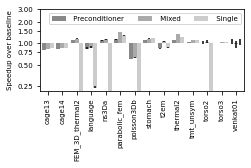

baseline mean runtime: 0.43831118452709983
singleprec mean runtime: 0.4556513677025647
singleprec mean speedup: 0.9619441871470822
mixed mean runtime: 0.39820238153126153
mixed mean speedup: 1.100724668801835
single mean runtime: 0.6137939125976514
single mean speedup: 0.9964748257030578
(0.33172192455212596, 1.880718045506526) ticked w/ [0.25, 0.5, 0.75, 1.0, 1.5, 2.0]


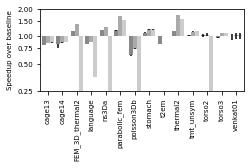

In [540]:
timings_restartsmart_mgs_ilujacobi3 = {
'cage13': [(0.0366805, 0.0366807, 0.0367077, 1, 5, '100', 'R1e-06', '0'), (0.0435475, 0.0435919, 0.0437608, 2, 10, '100', 'R1e-06', '0'), (0.0456595, 0.0457118, 0.0460823, 2, 10, '100', 'R1e-06', '0'), (0.042886999999999995, 0.042944899999999994, 0.0430293, 2, 10, '100', 'R1e-06', '0')],
'cage14': [(0.1133633, 0.11341889999999999, 0.1134753, 1, 5, '100', 'R1e-06', '0'), (0.1319997, 0.1320848, 0.1323578, 2, 10, '100', 'R1e-06', '0'), (0.1366588, 0.1366736, 0.1371413, 2, 10, '100', 'R1e-06', '0'), (0.1301629, 0.13051590000000002, 0.1306938, 2, 10, '100', 'R1e-06', '0')],
'FEM_3D_thermal2': [(1.1631051, 1.1644252, 1.167979, 6, 600, '100', '0', '0'), (1.0001182, 1.008623, 1.008913, 6, 600, '100', 'R1e-06', '0'), (1.0378977, 1.0408953, 1.043845, 6, 600, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'language': [(0.07497468, 0.0749828, 0.07956940000000001, 1, 9, '100', '1e-10', '0'), (0.08590636, 0.08596738, 0.08632821, 2, 16, '100', 'R1e-06', '0'), (0.0906173, 0.09111685, 0.091256, 2, 16, '100', 'R1e-06', '0'), (0.31286086, 0.31338539, 0.31360496000000004, 9, 72, '100', 'R1e-06', '0')],
'ns3Da': [(0.3349564, 0.3373844, 0.3406414, 3, 300, '100', '0', '0'), (0.2951511, 0.2976069, 0.2987562, 3, 300, '100', 'R1e-06', '0'), (0.306759, 0.3079998, 0.30839900000000003, 3, 300, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'parabolic_fem': [(2.5387487099999997, 2.54186056, 2.5455407099999996, 8, 800, '100', 'R1e-06', '0'), (1.76238978, 1.76239342, 1.7684675699999999, 8, 800, '100', 'R1e-06', '0'), (2.2474149299999997, 2.24748505, 2.25734988, 8, 800, '100', '1e-10', '0'), (1.97247482, 1.97408074, 1.9827600300000001, 9, 900, '100', 'R1e-06', '0')],
'poisson3Db': [(0.14322026000000002, 0.14350019, 0.1447935, 1, 100, '100', '0', '0'), (0.22629633000000002, 0.22824479, 0.22863377000000001, 2, 190, '100', 'R1e-06', '0'), (0.23766474999999998, 0.23896784, 0.23979469, 2, 190, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'stomach': [(0.1082071, 0.1084028, 0.10892669999999999, 2, 52, '100', 'R1e-06', '0'), (0.09333759999999999, 0.09341340000000001, 0.0937739, 2, 52, '100', 'R1e-06', '0'), (0.0971182, 0.097264, 0.097441, 2, 52, '100', 'R1e-06', '0'), (0.0918091, 0.09193119999999999, 0.0924367, 2, 52, '100', 'R1e-06', '0')],
't2em': [(19.27469, 19.372700000000002, 19.37926, 22, 2200, '100', 'R1e-06', '0'), (18.25078, 18.27333, 18.27353, 28, 2800, '100', '0', '0'), (22.76018, 22.824170000000002, 22.86335, 33, 3300, '100', '0', '0'), (21.901780000000002, 22.44829, 22.466169999999998, 39, 3900, '100', 'R1e-06', '0')],
'thermal2': [(36.229206600000005, 36.2490984, 36.2617458, 55, 5500, '100', '0', '0'), (26.6696612, 26.7015889, 26.7124868, 56, 5600, '100', 'R1e-06', '0'), (32.244666099999996, 32.2494716, 32.266350700000004, 56, 5600, '100', '0', '0'), (29.923026099999998, 29.9385943, 29.9559581, 63, 6300, '100', '1e-10', '0')],
'tmt_unsym': [(13.76387, 13.77391, 13.78919, 9, 900, '100', '0', '0'), (12.42908, 12.53076, 12.53885, 9, 900, '100', 'R1e-06', '0'), (13.27956, 13.324739999999998, 13.36981, 9, 900, '100', '0', '0'), (12.44122, 12.466899999999999, 12.48322, 9, 900, '100', '1e-10', '0')],
'torso2': [(0.05927930000000001, 0.0610495, 0.063267, 2, 18, '100', 'R1e-06', '0'), (0.057233200000000005, 0.058729, 0.0593743, 2, 18, '100', 'R1e-06', '0'), (0.0589148, 0.06061660000000001, 0.0612098, 2, 18, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'torso3': [(0.147045, 0.147046, 0.1471413, 1, 57, '100', '1e-10', '0'), (0.1406697, 0.14088509999999999, 0.14091879999999998, 2, 76, '100', 'R1e-06', '0'), (0.1464262, 0.1472159, 0.1478825, 2, 76, '100', 'R1e-06', '0'), (0.1398042, 0.1400251, 0.140044, 2, 76, '100', 'R1e-06', '0')],
'venkat01': [(0.11865110000000001, 0.1195962, 0.1324736, 2, 44, '100', 'R1e-06', '0'), (0.1228448, 0.124351, 0.1372222, 2, 44, '100', 'R1e-06', '0'), (0.11689640000000001, 0.11724280000000001, 0.1231773, 2, 44, '100', 'R1e-06', '0'), (0.1137204, 0.1187719, 0.1251779, 2, 44, '100', 'R1e-06', '0')],
}


# plot_times([timings_restartsmart_mgs_ilujacobi3],
#            [''],
#            'time-rlen=smart-gpu-ilujacobi3-mgs', save=True,
#            added_modifications=(lambda: plt.ylim(0.0, 2.3)),
#            skip_single_prec = skip_single_prec, small_figure=True)

plot_speedups([timings_restartsmart_mgs_ilujacobi3],
              [''],
              'speedup-rlen=smart-gpu-ilujacobi3-mgs', save=True,
              yticks=[0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0],
              small_figure=True, added_modifications=(lambda: plt.legend(ncol=3, loc='upper right')))


timings_restartsmart_cgsr_ilujacobi3 = {
'cage13': [(0.0367583, 0.0368462, 0.0368633, 1, 5, '100', 'R1e-06', '0'), (0.043729000000000004, 0.0438533, 0.0438663, 2, 10, '100', 'R1e-06', '0'), (0.0458905, 0.045909099999999994, 0.045924400000000004, 2, 10, '100', 'R1e-06', '0'), (0.0429434, 0.0430796, 0.0432423, 2, 10, '100', 'R1e-06', '0')],
'cage14': [(0.11354800000000001, 0.1135703, 0.1136932, 1, 5, '100', 'R1e-06', '0'), (0.1325766, 0.132638, 0.13314769999999998, 2, 10, '100', 'R1e-06', '0'), (0.13778410000000002, 0.13819969999999998, 0.1511263, 2, 10, '100', 'R1e-06', '0'), (0.1312036, 0.1313001, 0.1314699, 2, 10, '100', 'R1e-06', '0')],
'FEM_3D_thermal2': [(0.9220596, 0.9224054, 0.9235118, 6, 600, '100', '1e-10', '0'), (0.673108, 0.6740750000000001, 0.6755177, 6, 600, '100', '0', '0'), (0.7958874, 0.7965341, 0.801062, 6, 600, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'language': [(0.07445544, 0.07468443, 0.07483945, 1, 9, '100', '1e-10', '0'), (0.08578293000000001, 0.08580472, 0.08596075, 2, 16, '100', 'R1e-06', '0'), (0.09061295, 0.09075725, 0.0909129, 2, 16, '100', 'R1e-06', '0'), (0.20750501, 0.20806721, 0.20879477, 5, 46, '100', '1e-10', '0')],
'ns3Da': [(0.2289653, 0.22915409999999997, 0.2294127, 3, 300, '100', '0', '0'), (0.1784991, 0.1785517, 0.1788646, 3, 300, '100', 'R1e-06', '0'), (0.1962569, 0.1964478, 0.19668170000000001, 3, 300, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'parabolic_fem': [(2.02080468, 2.02191439, 2.0223148, 8, 800, '100', 'R1e-06', '0'), (1.19684448, 1.1985231, 1.2000086399999998, 8, 800, '100', 'R1e-06', '0'), (1.73441867, 1.73554208, 1.74446693, 8, 800, '100', 'R1e-06', '0'), (1.3405910699999999, 1.3422890699999999, 1.34242872, 9, 900, '100', '1e-10', '0')],
'poisson3Db': [(0.10020907, 0.10048482, 0.10064904999999999, 1, 100, '100', '1e-10', '0'), (0.13674818, 0.13687674, 0.13730033, 2, 190, '100', 'R1e-06', '0'), (0.16251396999999998, 0.16269853, 0.16294846, 2, 190, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'stomach': [(0.1027158, 0.1028007, 0.10328699999999999, 1, 48, '100', '1e-10', '0'), (0.0855157, 0.0858966, 0.0865421, 2, 52, '100', 'R1e-06', '0'), (0.09301380000000001, 0.0930326, 0.09386900000000001, 2, 52, '100', 'R1e-06', '0'), (0.0854251, 0.0858454, 0.0861017, 2, 52, '100', 'R1e-06', '0')],
't2em': [(17.47475, 17.494750000000003, 17.49828, 22, 2200, '100', '1e-10', '0'), (17.08223, 17.08565, 17.10834, 38, 3800, '100', 'R1e-06', '0'), (21.160989999999998, 21.215539999999997, 21.26939, 37, 3700, '100', '0', '0'), (17.43057, 17.447229999999998, 17.457250000000002, 40, 4000, '100', '1e-10', '0')],
'thermal2': [(31.689285799999997, 31.6935723, 31.7042184, 55, 5500, '100', 'R1e-06', '0'), (18.2408726, 18.2498188, 18.2826497, 56, 5600, '100', 'R1e-06', '0'), (27.6514098, 27.6575341, 27.6653538, 56, 5600, '100', '0', '0'), (20.1997949, 20.2074546, 20.2690171, 62, 6200, '100', 'R1e-06', '0')],
'tmt_unsym': [(12.99471, 13.023499999999999, 13.046520000000001, 9, 900, '100', '1e-10', '0'), (11.445870000000001, 11.52487, 11.55053, 9, 900, '100', 'R1e-06', '0'), (12.564700000000002, 12.66939, 12.68891, 9, 900, '100', '0', '0'), (11.416350000000001, 11.41704, 11.43886, 9, 900, '100', '0', '0')],
'torso2': [(0.0604723, 0.062075, 0.0627361, 1, 17, '100', '1e-10', '0'), (0.05743090000000001, 0.0595125, 0.060355, 2, 18, '100', 'R1e-06', '0'), (0.0588148, 0.0599036, 0.0607818, 2, 18, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'torso3': [(0.1336694, 0.13375510000000002, 0.1345532, 1, 57, '100', '1e-10', '0'), (0.1230711, 0.1232749, 0.123654, 2, 76, '100', 'R1e-06', '0'), (0.1369276, 0.1374397, 0.1378645, 2, 76, '100', 'R1e-06', '0'), (0.1225712, 0.1232511, 0.12332570000000001, 2, 76, '100', 'R1e-06', '0')],
'venkat01': [(0.11277870000000001, 0.1167685, 0.1199745, 1, 41, '100', '1e-10', '0'), (0.1105943, 0.1129378, 0.1217931, 2, 44, '100', 'R1e-06', '0'), (0.1113034, 0.1147827, 0.1220565, 1, 41, '100', '1e-10', '0'), (0.10900860000000001, 0.11280799999999999, 0.12173629999999999, 1, 41, '100', '1e-10', '0')],
}


# plot_times([timings_restartsmart_cgsr_ilujacobi3],
#            [''],
#            'time-rlen=smart-gpu-ilujacobi3-cgsr', save=True,
#            added_modifications=(lambda: plt.ylim(0.0, 2.3)),
#            skip_single_prec = skip_single_prec, small_figure=True)

plot_speedups([timings_restartsmart_cgsr_ilujacobi3],
              [''],
              'speedup-rlen=smart-gpu-ilujacobi3-cgsr', save=True,
              yticks=[0.25, 0.5, 0.75, 1.0, 1.5, 2.0],
              small_figure=True)

# plot_times([timings_restartsmart_mgs_ilujacobi3, timings_restartsmart_cgsr_ilujacobi3],
#            ['MGS', 'CGSR'],
#            'time-rlen=smart-gpu-ilujacobi3', save=False)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


baseline mean runtime: 0.4823609541825508
singleprec mean runtime: 0.469008803321499
singleprec mean speedup: 1.0284688704486835
mixed mean runtime: 0.447748430083233
mixed mean speedup: 1.077303507446991
single mean runtime: 0.6646939015113951
single mean speedup: 1.0400813028347509
(0.6706796540949784, 1.5231267313446295) ticked w/ [0.75, 1.0, 1.5, 2.0]


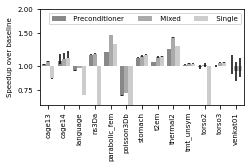

baseline mean runtime: 0.44759596110332034
singleprec mean runtime: 0.43075074792820744
singleprec mean speedup: 1.0391066370891606
mixed mean runtime: 0.3960961355342736
mixed mean speedup: 1.130018500431925
single mean runtime: 0.6379185827569046
single mean speedup: 1.041179027577872
(0.43352711160372304, 1.846067587190925) ticked w/ [0.5, 0.75, 1.0, 1.5, 2.0]


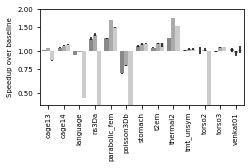

In [538]:
timings_restartsmart_mgs_ilujacobi5 = {
'cage13': [(0.0530839, 0.0531596, 0.0534708, 1, 7, '100', '1e-10', '0'), (0.0500959, 0.050129999999999994, 0.0502334, 2, 8, '100', 'R1e-06', '0'), (0.051951199999999996, 0.0519612, 0.052089300000000005, 2, 8, '100', 'R1e-06', '0'), (0.061712100000000006, 0.0617403, 0.061973200000000006, 3, 12, '100', 'R1e-06', '0')],
'cage14': [(0.17141260000000003, 0.1716035, 0.1846848, 1, 7, '100', '1e-10', '0'), (0.1564189, 0.1564258, 0.1564284, 2, 8, '100', 'R1e-06', '0'), (0.15964699999999998, 0.1605693, 0.1678037, 2, 8, '100', 'R1e-06', '0'), (0.1543394, 0.1545686, 0.15465479999999998, 2, 8, '100', 'R1e-06', '0')],
'language': [(0.10525062, 0.10528325, 0.10545326, 1, 9, '100', '1e-10', '0'), (0.10724234, 0.10726023999999999, 0.10739247, 2, 14, '100', 'R1e-06', '0'), (0.11117414, 0.11179065999999999, 0.11180771, 2, 14, '100', 'R1e-06', '0'), (0.14937287, 0.14944078, 0.14947832000000003, 3, 21, '100', 'R1e-06', '0')],
'ns3Da': [(0.2909922, 0.2916497, 0.2931108, 2, 200, '100', 'R1e-06', '0'), (0.2499937, 0.2503471, 0.25045819999999996, 2, 200, '100', 'R1e-06', '0'), (0.2540211, 0.2548739, 0.2552953, 2, 200, '100', '0', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'parabolic_fem': [(3.0937316700000004, 3.09395688, 3.09422244, 8, 800, '100', '1e-10', '0'), (2.10866384, 2.1130878699999998, 2.11358848, 8, 800, '100', 'R1e-06', '0'), (2.58882859, 2.5911888800000002, 2.59410072, 8, 800, '100', '0', '0'), (2.35842483, 2.36033824, 2.3693578299999998, 9, 900, '100', '0', '0')],
'poisson3Db': [(0.17542947, 0.1756752, 0.17587585, 1, 100, '100', '1e-10', '0'), (0.24286036, 0.24287184, 0.24453813, 2, 174, '100', 'R1e-06', '0'), (0.25123184, 0.25144974, 0.25199711, 2, 174, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'stomach': [(0.0796779, 0.08004140000000001, 0.0806865, 1, 21, '100', '1e-10', '0'), (0.0707346, 0.0708632, 0.0710074, 2, 22, '100', 'R1e-06', '0'), (0.07198840000000001, 0.0723785, 0.0724827, 2, 22, '100', 'R1e-06', '0'), (0.06969739999999999, 0.0698414, 0.0698474, 2, 22, '100', 'R1e-06', '0')],
't2em': [(13.617070000000002, 13.65145, 13.65933, 8, 800, '100', '0', '0'), (12.12624, 12.159370000000001, 12.3075, 8, 800, '100', 'R1e-06', '0'), (12.91278, 12.93784, 12.93911, 8, 800, '100', '0', '0'), (12.09721, 12.11281, 12.20227, 8, 800, '100', '1e-10', '0')],
'thermal2': [(41.7614715, 41.778771, 41.8231649, 51, 5100, '100', '0', '0'), (29.3789664, 29.398685099999998, 29.4765709, 51, 5100, '100', 'R1e-06', '0'), (33.8210214, 33.8245341, 33.8700172, 50, 5000, '100', '1e-10', '0'), (32.783631299999996, 32.8111792, 32.855291199999996, 57, 5700, '100', '1e-10', '0')],
'tmt_unsym': [(10.73434, 10.74101, 10.77257, 2, 200, '100', '1e-10', '0'), (10.318305, 10.378464000000001, 10.442888, 2, 200, '100', '0', '0'), (10.514987, 10.539712000000002, 10.626669, 2, 200, '100', '0', '0'), (10.357956000000001, 10.407941000000001, 10.446048, 2, 200, '100', '1e-10', '0')],
'torso2': [(0.0586617, 0.059893, 0.060728199999999996, 1, 11, '100', '1e-10', '0'), (0.05825698, 0.058982969999999996, 0.059143129999999995, 2, 12, '100', 'R1e-06', '0'), (0.059567800000000004, 0.0602455, 0.0604214, 2, 12, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'torso3': [(0.1597583, 0.1614239, 0.16151490000000002, 1, 48, '100', '1e-10', '0'), (0.1543287, 0.1544762, 0.1546127, 2, 64, '100', 'R1e-06', '0'), (0.1595647, 0.160379, 0.1605805, 2, 64, '100', 'R1e-06', '0'), (0.1536357, 0.1538784, 0.1546195, 2, 64, '100', 'R1e-06', '0')],
'venkat01': [(0.0989081, 0.1060343, 0.1148835, 1, 16, '100', 'R1e-06', '0'), (0.10932950000000001, 0.11230000000000001, 0.1186674, 1, 16, '100', 'R1e-06', '0'), (0.10042899999999999, 0.1063472, 0.1082021, 1, 16, '100', 'R1e-06', '0'), (0.103685, 0.1125023, 0.1133546, 1, 16, '100', 'R1e-06', '0')],
}

# plot_times([timings_restartsmart_mgs_ilujacobi5],
#            [''],
#            'time-rlen=smart-gpu-ilujacobi5-mgs', save=True,
#            added_modifications=(lambda: plt.ylim(0.0, 1.9)),
#            skip_single_prec = skip_single_prec, small_figure=True)

plot_speedups([timings_restartsmart_mgs_ilujacobi5],
              [''],
              'speedup-rlen=smart-gpu-ilujacobi5-mgs', save=True,
              yticks=[0.75, 1.0, 1.5, 2.0],
              small_figure=True, added_modifications=(lambda: plt.legend(ncol=3, loc='upper right')))

timings_restartsmart_cgsr_ilujacobi5 = {
'cage13': [(0.0531587, 0.0531735, 0.053387699999999996, 1, 7, '100', '1e-10', '0'), (0.050272199999999996, 0.050513, 0.0505413, 2, 8, '100', 'R1e-06', '0'), (0.0521036, 0.0521463, 0.0521764, 2, 8, '100', 'R1e-06', '0'), (0.0616916, 0.061743900000000004, 0.0619401, 3, 12, '100', 'R1e-06', '0')],
'cage14': [(0.172194, 0.1722651, 0.17420400000000003, 1, 7, '100', '1e-10', '0'), (0.15683339999999998, 0.1571294, 0.15796960000000002, 2, 8, '100', 'R1e-06', '0'), (0.1608891, 0.1619924, 0.1632187, 2, 8, '100', 'R1e-06', '0'), (0.1550018, 0.15500339999999999, 0.1553952, 2, 8, '100', 'R1e-06', '0')],
'language': [(0.10538513, 0.10544927, 0.10573528, 1, 9, '100', '1e-10', '0'), (0.10707175, 0.10711695, 0.10730902, 2, 14, '100', 'R1e-06', '0'), (0.11192980000000001, 0.11200410000000001, 0.11206102, 2, 14, '100', 'R1e-06', '0'), (0.22698891999999998, 0.22773295999999998, 0.22775137, 4, 35, '100', '1e-10', '0')],
'ns3Da': [(0.2186206, 0.2211385, 0.2283205, 2, 200, '100', '1e-10', '0'), (0.1689463, 0.1690941, 0.169866, 2, 200, '100', 'R1e-06', '0'), (0.1807108, 0.1813479, 0.1814945, 2, 200, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'parabolic_fem': [(2.57322226, 2.57474987, 2.5758127699999998, 8, 800, '100', '0', '0'), (1.54234382, 1.54360338, 1.54415938, 8, 800, '100', 'R1e-06', '0'), (2.07778339, 2.08147364, 2.09428866, 8, 800, '100', 'R1e-06', '0'), (1.72784255, 1.73162515, 1.7471481100000001, 9, 900, '100', '0', '0')],
'poisson3Db': [(0.13257848, 0.13263333000000002, 0.13321094, 1, 100, '100', '1e-10', '0'), (0.16740716, 0.16791057, 0.16813895, 2, 174, '100', 'R1e-06', '0'), (0.18954497, 0.18970694, 0.19203956, 2, 174, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'stomach': [(0.0778437, 0.07836499999999999, 0.07914, 1, 21, '100', '1e-10', '0'), (0.0695182, 0.06980120000000001, 0.07044020000000001, 2, 22, '100', 'R1e-06', '0'), (0.0713767, 0.0716578, 0.072298, 2, 22, '100', 'R1e-06', '0'), (0.0688564, 0.0690616, 0.069166, 2, 22, '100', 'R1e-06', '0')],
't2em': [(12.946740000000002, 12.97689, 12.980269999999999, 8, 800, '100', '0', '0'), (11.27257, 11.364069999999998, 11.41026, 8, 800, '100', 'R1e-06', '0'), (12.155529999999999, 12.19534, 12.31155, 8, 800, '100', '0', '0'), (11.228299999999999, 11.2933, 12.07422, 8, 800, '100', 'R1e-06', '0')],
'thermal2': [(37.554615600000005, 37.5573184, 37.567257, 51, 5100, '100', '1e-10', '0'), (21.7351836, 21.7383438, 21.7835672, 51, 5100, '100', 'R1e-06', '0'), (30.2935294, 30.3146367, 30.3173251, 51, 5100, '100', '1e-10', '0'), (24.7150988, 24.726458100000002, 24.8295102, 58, 5800, '100', '0', '0')],
'tmt_unsym': [(10.495748, 10.606770000000001, 10.64547, 2, 200, '100', '0', '0'), (10.122831, 10.140521999999999, 10.225776, 2, 200, '100', '0', '0'), (10.372107, 10.391172, 10.472562, 2, 200, '100', '0', '0'), (10.125772000000001, 10.166922, 10.184417, 2, 200, '100', '1e-10', '0')],
'torso2': [(0.059025, 0.0590604, 0.0606549, 1, 11, '100', '1e-10', '0'), (0.05723779, 0.057406479999999996, 0.05826564, 2, 12, '100', 'R1e-06', '0'), (0.0566331, 0.0588813, 0.0613708, 2, 12, '100', 'R1e-06', '0'), ('-', '-', '-', '-', '-', '-', '-', '-')],
'torso3': [(0.1528485, 0.1532133, 0.1532266, 1, 48, '100', '1e-10', '0'), (0.1426553, 0.1428724, 0.1435899, 2, 64, '100', 'R1e-06', '0'), (0.1533148, 0.1538102, 0.1543274, 2, 64, '100', 'R1e-06', '0'), (0.142339, 0.1432545, 0.1432741, 2, 64, '100', 'R1e-06', '0')],
'venkat01': [(0.10331699999999999, 0.1082352, 0.1095387, 1, 16, '100', 'R1e-06', '0'), (0.1082883, 0.1105488, 0.111979, 1, 16, '100', 'R1e-06', '0'), (0.1038187, 0.1040598, 0.10498160000000001, 1, 16, '100', 'R1e-06', '0'), (0.1002928, 0.1052738, 0.10589000000000001, 1, 16, '100', 'R1e-06', '0')],
}


# plot_times([timings_restartsmart_cgsr_ilujacobi5],
#            [''],
#            'time-rlen=smart-gpu-ilujacobi5-cgsr', save=True,
#            added_modifications=(lambda: plt.ylim(0.0, 1.9)),
#            skip_single_prec = skip_single_prec, small_figure=True)

plot_speedups([timings_restartsmart_cgsr_ilujacobi5],
              [''],
              'speedup-rlen=smart-gpu-ilujacobi5-cgsr', save=True,
              small_figure=True, yticks=[0.5, 0.75, 1.0, 1.5, 2.0])

# plot_times([timings_restartsmart_mgs_ilujacobi5, timings_restartsmart_cgsr_ilujacobi5],
#            ['MGS', 'CGSR'],
#            'time-rlen=smart-gpu-ilujacobi5', save=False)


# Analysis

rows vs speedup med:
  log y = 0.07672414461600977*log x + -0.840397906119776
  r^2 = 0.2168130336226538


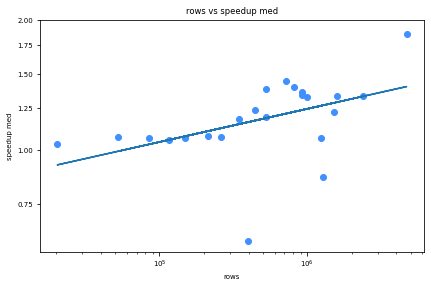

nnz vs speedup med:
  log y = 0.1079260842830734*log x + -1.5147517044068433
  r^2 = 0.22895188798995914


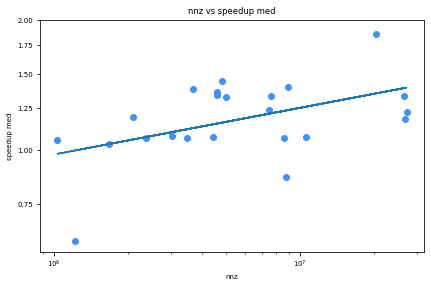

nnz per row vs speedup med:
  log y = -0.027606499302530133*log x + 0.2300428304539617
  r^2 = 0.01944879880562922


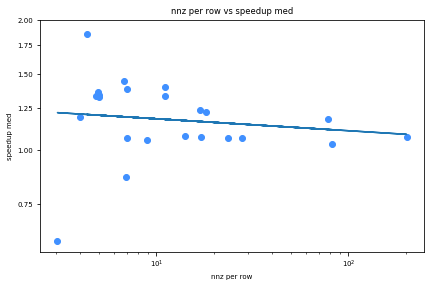

cond 2 vs speedup med:
  log y = 0.011192215044922259*log x + 0.03435341575480257
  r^2 = 0.13377858212139393


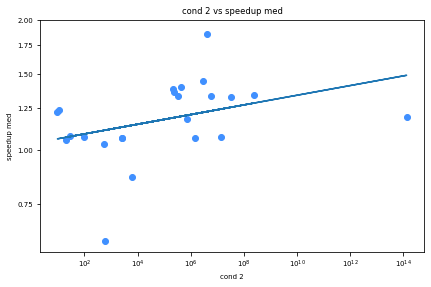

baseline med vs speedup med:
  log y = 0.04128281078194052*log x + 0.11977600951560703
  r^2 = 0.30186910103594045


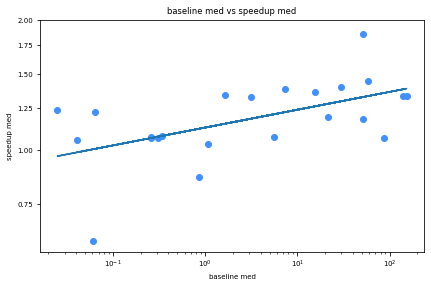

baseline iterations vs speedup med:
  log y = 0.045487963106388835*log x + -0.16465127982458766
  r^2 = 0.255568554409925


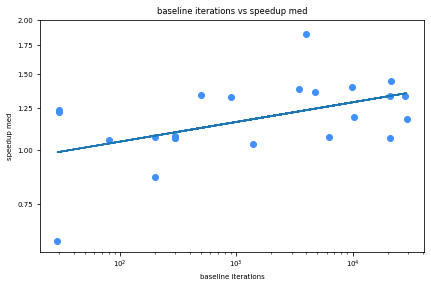

baseline restarts vs speedup med:
  log y = 0.055456374579825655*log x + 0.004851931148004912
  r^2 = 0.2708575520603762


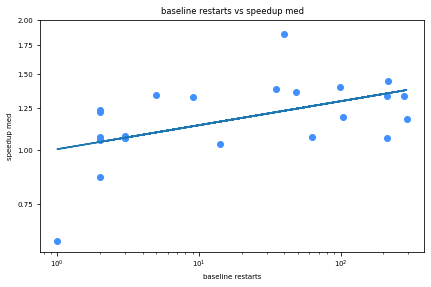

iterations per restart vs speedup med:
  log y = 0.09071952701254125*log x + -0.23251396479308548
  r^2 = 0.06660829241295507


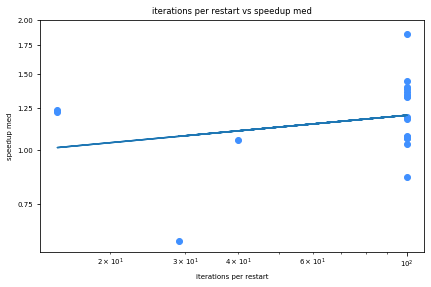

----------------------------------------------------------------------------------------------------
baseline med vs cond 2:
  log y = 1.6919551033367235*log x + 9.66486032647379
  r^2 = 0.4747919162815941


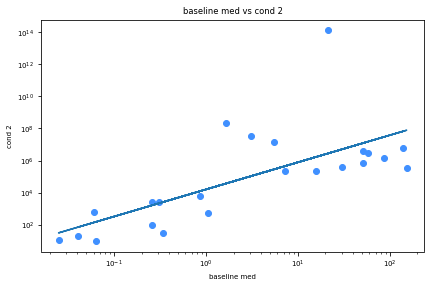

rows vs cond 2:
  log y = 1.5983472165145083*log x + -9.490935029906485
  r^2 = 0.08810672065322245


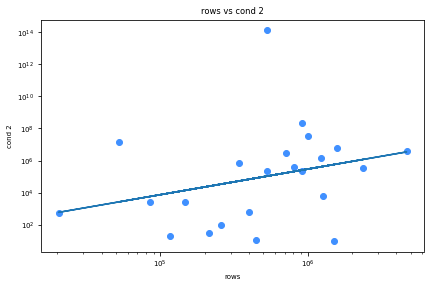

nnz vs cond 2:
  log y = 0.7031601019621191*log x + 0.46420554128170555
  r^2 = 0.009100082558486378


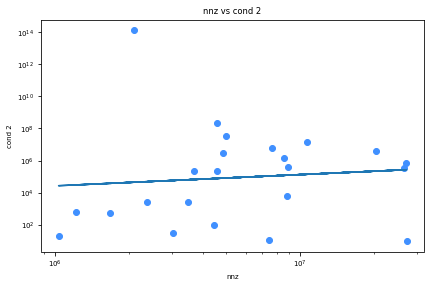

rows vs baseline med:
  log y = 0.999315360446117*log x + -12.035429552499775
  r^2 = 0.20765684823976327


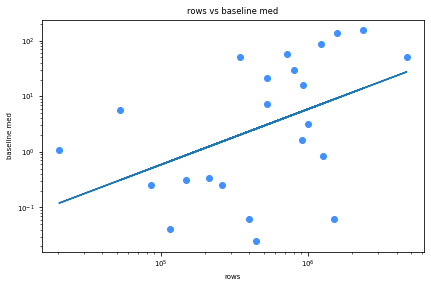

nnz vs baseline med:
  log y = 1.3787099091513662*log x + -20.399254634483633
  r^2 = 0.21093907572418946


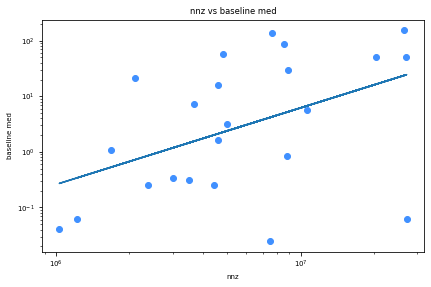

cond 2 vs baseline iterations:
  log y = 0.2291925447902721*log x + 4.566823104535072
  r^2 = 0.45419362465288593


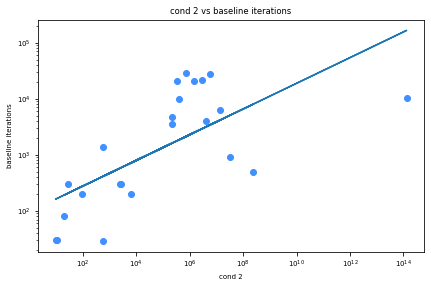

In [526]:
plot_scatter(timings_restartsmart_mgs_identity, 'rows', 'speedup med')
plot_scatter(timings_restartsmart_mgs_identity, 'nnz', 'speedup med')
plot_scatter(timings_restartsmart_mgs_identity, 'nnz per row', 'speedup med')
plot_scatter(timings_restartsmart_mgs_identity, 'cond 2', 'speedup med')
plot_scatter(timings_restartsmart_mgs_identity, 'baseline med', 'speedup med')
plot_scatter(timings_restartsmart_mgs_identity, 'baseline iterations', 'speedup med', xlog=True)
plot_scatter(timings_restartsmart_mgs_identity, 'baseline restarts', 'speedup med', xlog=True)
plot_scatter(timings_restartsmart_mgs_identity, 'iterations per restart', 'speedup med')

print('-'*100)

plot_scatter(timings_restartsmart_mgs_identity, 'baseline med', 'cond 2')
plot_scatter(timings_restartsmart_mgs_identity, 'rows', 'cond 2')
plot_scatter(timings_restartsmart_mgs_identity, 'nnz', 'cond 2')
plot_scatter(timings_restartsmart_mgs_identity, 'rows', 'baseline med')
plot_scatter(timings_restartsmart_mgs_identity, 'nnz', 'baseline med')
plot_scatter(timings_restartsmart_mgs_identity, 'cond 2', 'baseline iterations', ylog=True)

rows vs speedup med:
  log y = 0.14381498196043402*log x + -1.4023425697041716
  r^2 = 0.30457222298306696


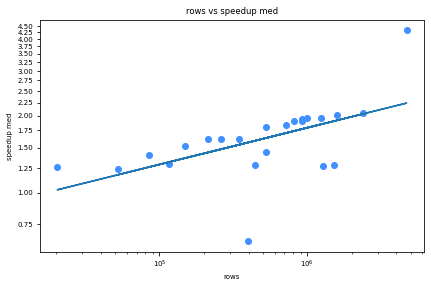

nnz vs speedup med:
  log y = 0.17125020765785245*log x + -2.184024734688754
  r^2 = 0.2304699762228115


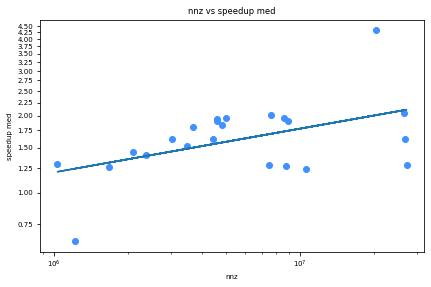

nnz per row vs speedup med:
  log y = -0.07566325616672737*log x + 0.663255837524845
  r^2 = 0.058411843942958064


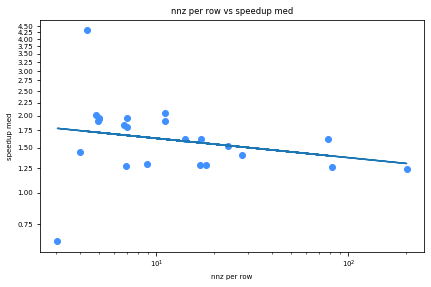

cond 2 vs speedup med:
  log y = 0.01744591355629413*log x + 0.2775624331643341
  r^2 = 0.12995789984468986


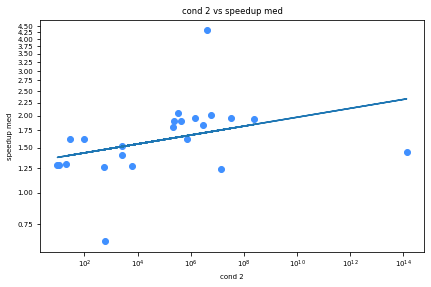

baseline med vs speedup med:
  log y = 0.07559518729943616*log x + 0.4226789529343917
  r^2 = 0.4221689422469064


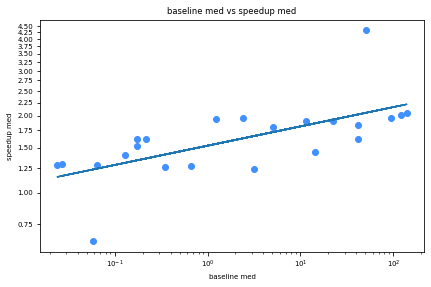

baseline iterations vs speedup med:
  log y = 0.07851637289561123*log x + -0.08817011417957493
  r^2 = 0.30848139991955514


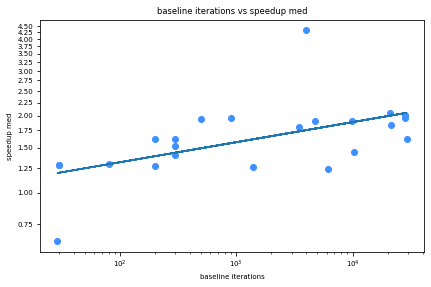

baseline restarts vs speedup med:
  log y = 0.08501357492396741*log x + 0.2346416941923316
  r^2 = 0.2588361515496366


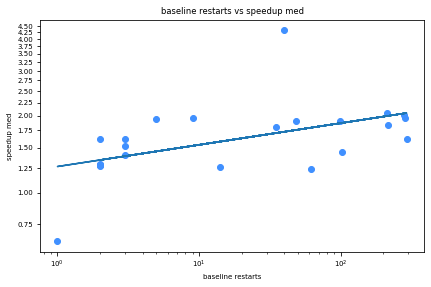

iterations per restart vs speedup med:
  log y = 0.27326258975729295*log x + -0.71152368647114
  r^2 = 0.24162833465768918


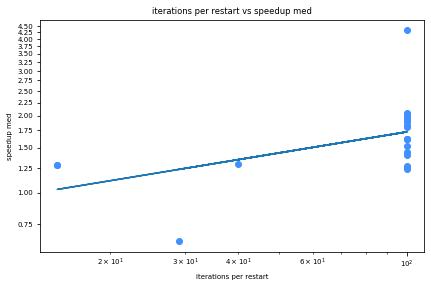

In [527]:
plot_scatter(timings_restartsmart_cgsr_identity, 'rows', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_identity, 'nnz', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_identity, 'nnz per row', 'speedup med')
#plot_scatter(timings_restartsmart_cgsr_identity, 'cond 1', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_identity, 'cond 2', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_identity, 'baseline med', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_identity, 'baseline iterations', 'speedup med', xlog=True)
plot_scatter(timings_restartsmart_cgsr_identity, 'baseline restarts', 'speedup med', xlog=True)
plot_scatter(timings_restartsmart_cgsr_identity, 'iterations per restart', 'speedup med')

baseline med vs cond 2:
  log y = 1.6356352646577348*log x + 10.22874748119149
  r^2 = 0.4628664090991462


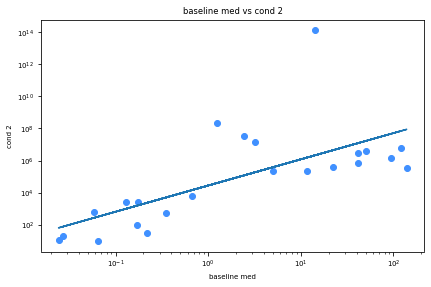

cond 2 vs baseline med:
  log y = 0.28298876840125053*log x + -2.5141609264928912
  r^2 = 0.4628664090991461


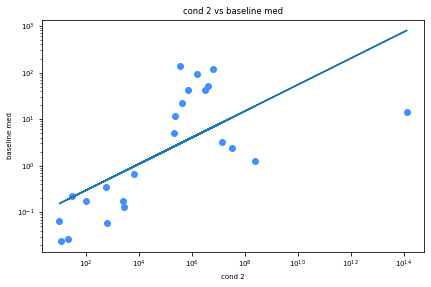

rows vs cond 2:
  log y = 1.5983472165145083*log x + -9.490935029906485
  r^2 = 0.08810672065322245


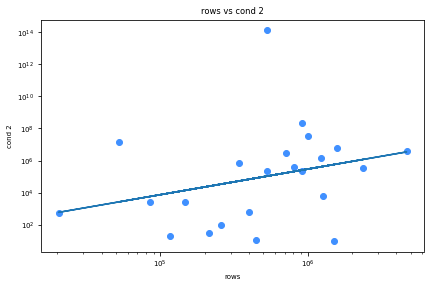

nnz vs cond 2:
  log y = 0.7031601019621191*log x + 0.46420554128170555
  r^2 = 0.009100082558486378


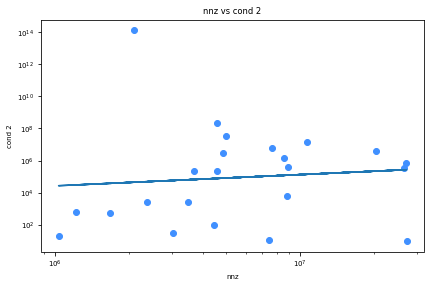

rows vs baseline med:
  log y = 1.171822076434951*log x + -14.598476678790957
  r^2 = 0.2737205452877338


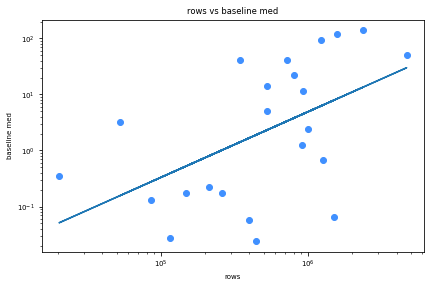

nnz vs baseline med:
  log y = 1.529993022100389*log x + -23.05902697379238
  r^2 = 0.24901932876129007


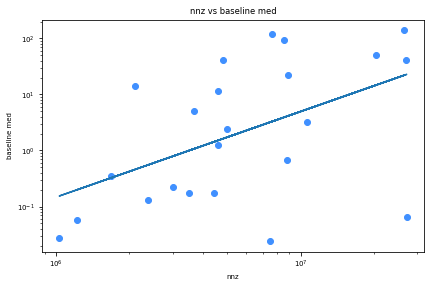

cond 2 vs baseline iterations:
  log y = 0.2295318566317648*log x + 4.574490244872339
  r^2 = 0.44956517928162876


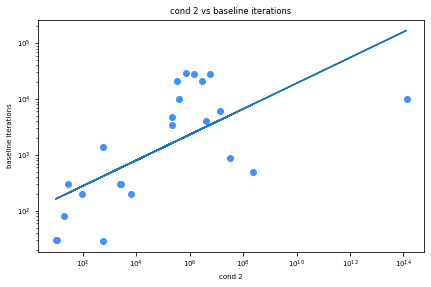

cond 2 vs baseline restarts:
  log y = 0.18400187800083084*log x + 0.7464095412504739
  r^2 = 0.40365597701248324


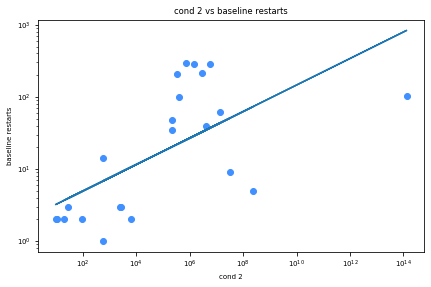

rows vs baseline restarts:
  log y = 0.4738976954543572*log x + -3.3485416249475746
  r^2 = 0.09234275953363646


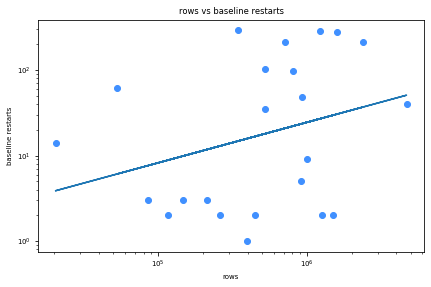

nnz vs baseline restarts:
  log y = 0.9210217513108072*log x + -11.465718185130912
  r^2 = 0.18614164236536268


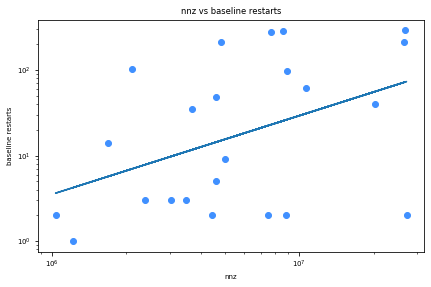

rows vs nnz:
  log y = 0.42040068961175425*log x + 10.042845393628793
  r^2 = 0.33117437617701717


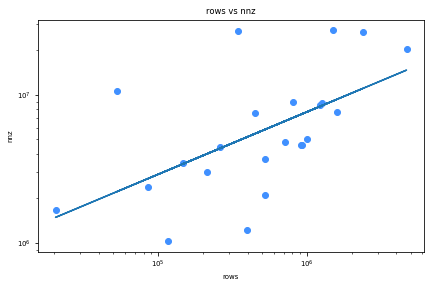

In [528]:
plot_scatter(timings_restartsmart_cgsr_identity, 'baseline med', 'cond 2')
plot_scatter(timings_restartsmart_cgsr_identity, 'cond 2', 'baseline med')
plot_scatter(timings_restartsmart_cgsr_identity, 'rows', 'cond 2')
plot_scatter(timings_restartsmart_cgsr_identity, 'nnz', 'cond 2')
plot_scatter(timings_restartsmart_cgsr_identity, 'rows', 'baseline med')
plot_scatter(timings_restartsmart_cgsr_identity, 'nnz', 'baseline med')
plot_scatter(timings_restartsmart_cgsr_identity, 'cond 2', 'baseline iterations', ylog=True)
plot_scatter(timings_restartsmart_cgsr_identity, 'cond 2', 'baseline restarts')
plot_scatter(timings_restartsmart_cgsr_identity, 'rows', 'baseline restarts')
plot_scatter(timings_restartsmart_cgsr_identity, 'nnz', 'baseline restarts')
plot_scatter(timings_restartsmart_cgsr_identity, 'rows', 'nnz')

rows vs speedup med:
  log y = 0.08795197707800308*log x + -0.7415502417432518
  r^2 = 0.17418120305918672


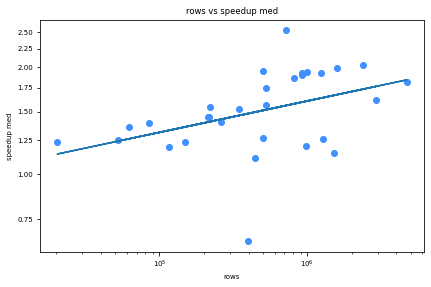

nnz vs speedup med:
  log y = 0.05686738169289984*log x + -0.4931670158014138
  r^2 = 0.058743935830967375


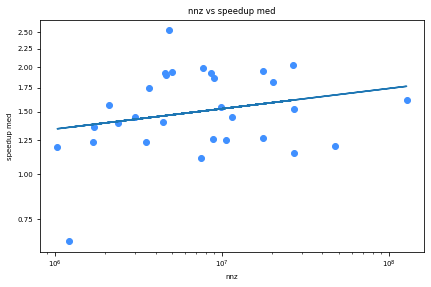

nnz per row vs speedup med:
  log y = -0.057098964910424856*log x + 0.5622283513316749
  r^2 = 0.0540963481925264


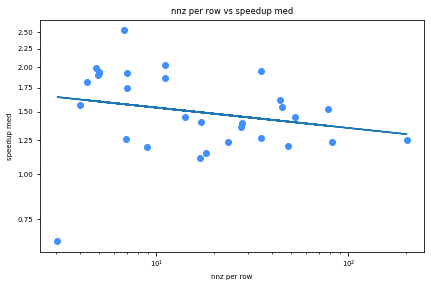

cond 1 vs speedup med:
  Missing fields for: ['af_0_k101' 'af_shell9' 'apache2' 'bone010' 'Bump_2911' 'cage13' 'cage14'
 'crankseg_1' 'CurlCurl_2' 'CurlCurl_4' 'ecology2' 'G3_circuit' 'hood'
 'poisson3Db' 'pwtk' 't2em' 'thermal2' 'tmt_unsym']
  log y = 0.008035648807121756*log x + 0.16746304242155038
  r^2 = 0.13768900767679737


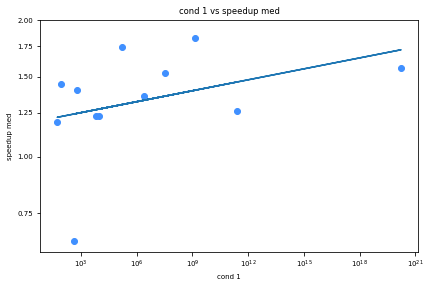

cond 2 vs speedup med:
  log y = 0.021063610379306888*log x + 0.1539676153994688
  r^2 = 0.23992038800127824


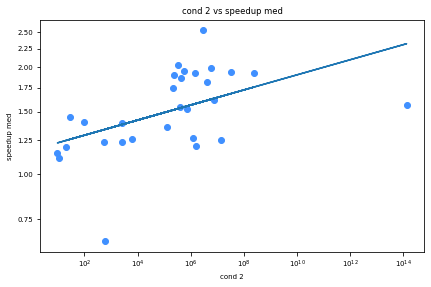

baseline med vs speedup med:
  log y = 0.057271205720127984*log x + 0.37525342421767166
  r^2 = 0.3384772525539953


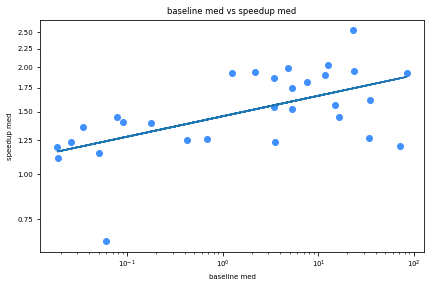

baseline iterations vs speedup med:
  log y = 0.05929232051614028*log x + -0.0083708632149454
  r^2 = 0.2646026017541523


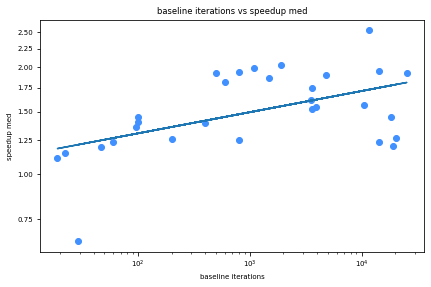

baseline restarts vs speedup med:
  log y = 0.058821469014645016*log x + 0.25186095685422355
  r^2 = 0.18921248287953574


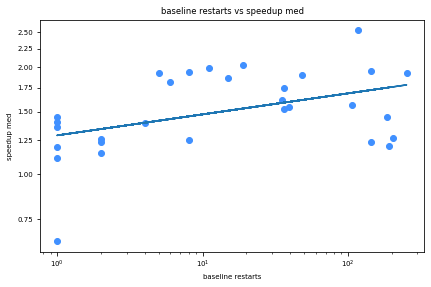

iterations per restart vs speedup med:
  log y = 0.2659013934041638*log x + -0.7567243269964918
  r^2 = 0.33130097296581407


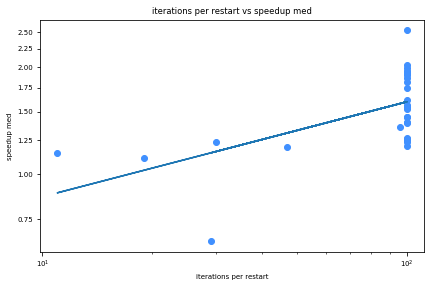

In [529]:
plot_scatter(timings_restartsmart_cgsr_jacobi, 'rows', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'nnz', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'nnz per row', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'cond 1', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'cond 2', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'baseline med', 'speedup med')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'baseline iterations', 'speedup med', xlog=True)
plot_scatter(timings_restartsmart_cgsr_jacobi, 'baseline restarts', 'speedup med', xlog=True)
plot_scatter(timings_restartsmart_cgsr_jacobi, 'iterations per restart', 'speedup med')

baseline med vs cond 2:
  log y = 1.4935521582602287*log x + 11.138144890415854
  r^2 = 0.42569259211046817


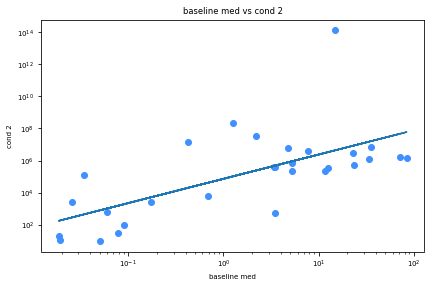

cond 2 vs baseline med:
  log y = 0.2850202383332485*log x + -2.8781440107698506
  r^2 = 0.4256925921104684


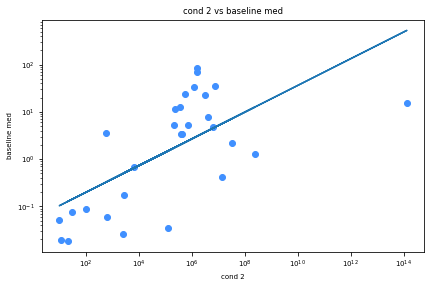

rows vs cond 2:
  log y = 1.4452263475254044*log x + -6.927984619657963
  r^2 = 0.0869721657003899


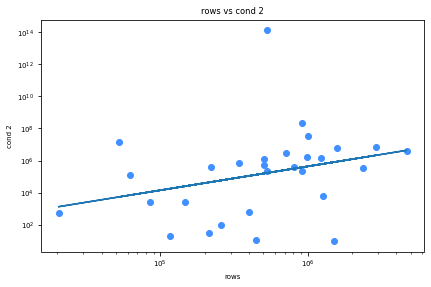

nnz vs cond 2:
  log y = 1.000028390370118*log x + -3.882177794605263
  r^2 = 0.033593844306988085


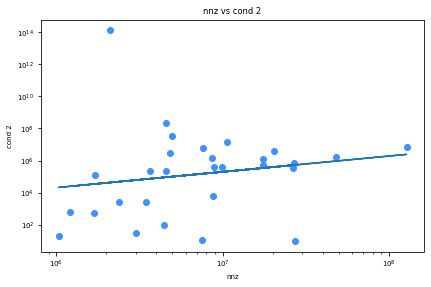

rows vs baseline med:
  log y = 0.9753495969801417*log x + -12.196520699482571
  r^2 = 0.20757443105640538


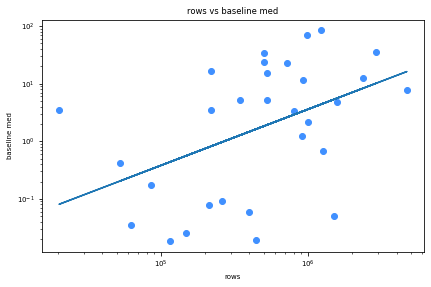

nnz vs baseline med:
  log y = 1.2681163382420964*log x + -19.508422362973345
  r^2 = 0.28307266702739153


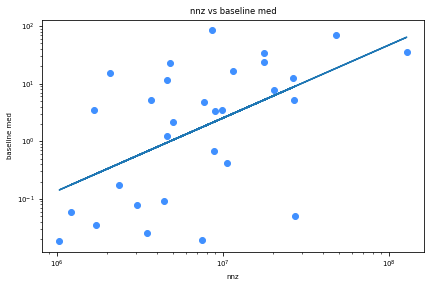

cond 2 vs baseline iterations:
  log y = 0.22805197431622348*log x + 4.252751549899855
  r^2 = 0.37365602311757806


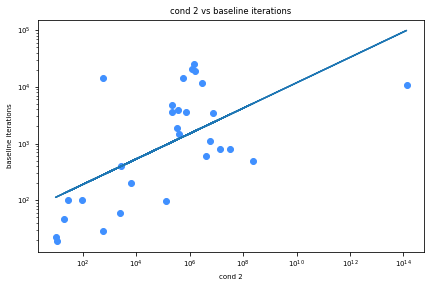

cond 2 vs baseline restarts:
  log y = 0.17735114996516396*log x + 0.4882393530790564
  r^2 = 0.3110222760668834


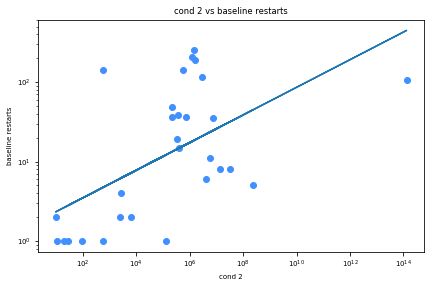

rows vs baseline restarts:
  log y = 0.2241730143677182*log x + -0.321539728956472
  r^2 = 0.02069181965350575


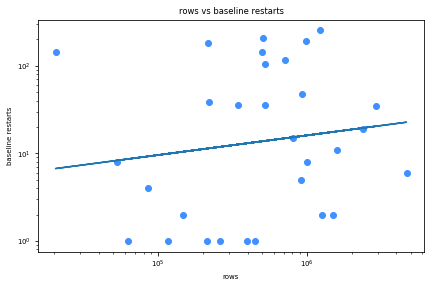

nnz vs baseline restarts:
  log y = 0.6589093892251259*log x + -7.804395841643022
  r^2 = 0.1442148278000429


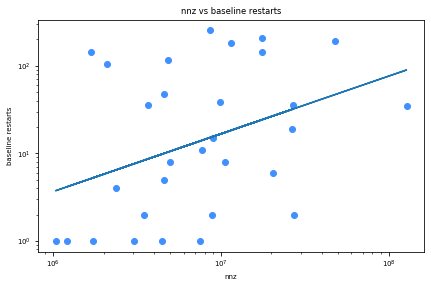

rows vs nnz:
  log y = 0.5349194835398337*log x + 8.818689874195853
  r^2 = 0.3546911325340354


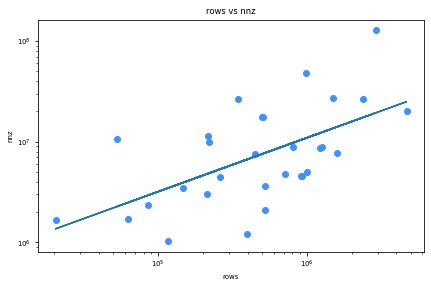

In [530]:
plot_scatter(timings_restartsmart_cgsr_jacobi, 'baseline med', 'cond 2')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'cond 2', 'baseline med')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'rows', 'cond 2')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'nnz', 'cond 2')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'rows', 'baseline med')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'nnz', 'baseline med')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'cond 2', 'baseline iterations', ylog=True)
plot_scatter(timings_restartsmart_cgsr_jacobi, 'cond 2', 'baseline restarts')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'rows', 'baseline restarts')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'nnz', 'baseline restarts')
plot_scatter(timings_restartsmart_cgsr_jacobi, 'rows', 'nnz')

# Numerical table

In [531]:
def strategy_name(code):
    code = str(code)
    if code == '0':
        return 'Iterations'
    elif code == 'R1e-06':
        return 'Repeated'
    elif code == '1e-10':
        return 'Tolerance'
    else:
        error('Unknown code: '+code)

def generate_table_full_1(dataset, single_prec=False):
    for name,values in dataset.items():
        print('\t\\suitesparse{'+name.replace('_', '\\_')+'}')
        print('\t\t& Baseline & '+str(values[0][3])+' & '+str(values[0][4])+' & '+str(values[0][6])
                           +' & '+str(values[0][0])+' & '+str(values[0][1])+' & '+str(values[0][2])+' \\\\')
        print('\t\t& Mixed    & '+str(values[1][3])+' & '+str(values[1][4])+' & '+str(values[1][6])
                           +' & '+str(values[1][0])+' & '+str(values[1][1])+' & '+str(values[1][2])+' \\\\')
        if single_prec:
            print('\t\t& Preconditioner & '+str(values[2][3])+' & '+str(values[2][4])+' & '+str(values[2][6])
                                     +' & '+str(values[2][0])+' & '+str(values[2][1])+' & '+str(values[2][2])+' \\\\')

def generate_table_full_2(dataset, single_prec=False):
    for name,values in dataset.items():
        print('\t\\suitesparse{'+name.replace('_', '\\_')+'}')
        print('\t\t & '+str(values[0][3])+' & '+str(values[0][4])+' & '+strategy_name(values[0][6])+' & '+str(values[0][1]))
        print('\t\t & '+str(values[1][3])+' & '+str(values[1][4])+' & '+                                  str(values[1][1]), end='')
        if single_prec:
            print('\n\t\t & '+str(values[2][3])+' & '+str(values[2][4])+' & '+strategy_name(values[2][6])+' & '+str(values[2][1]), end='')
        print(' \\\\')
        
#\begin{tabular}{r|S[table-format=3.0]S[table-format=5.0]cS[table-format=4.3,table-auto-round]|S[table-format=3.0]S[table-format=5.0]S[table-format=4.3,table-auto-round]|S[table-format=3.0]S[table-format=5.0]cS[table-format=4.3,table-auto-round]}
#	& \multicolumn{4}{c|}{Baseline} & \multicolumn{3}{c}{Mixed Precision} & \multicolumn{4}{c}{Reduced Preconditioner} \\
#	Matrix & {Restart} & {Iteration} & {Strategy} & {Med. Time (s)} & {Restart} & {Iteration} & {Med. Time (s)}& {Restart} & {Iteration} & {Strategy} & {Med. Time (s)}  \\

def to_plot(s):
    if s == '-':
        return '{-}'
    else:
        return str(s)

def generate_table(dataset_mgs, dataset_cgsr, single_prec=False):
    for name,values in dataset_mgs.items():
#         if dataset_cgsr[name][0][4] != values[0][4]:
#             print('ERR: diff baseline iters ('+str(dataset_cgsr[name][0][4])+','+str(values[0][4])+')')
#         if dataset_cgsr[name][1][4] != values[1][4]:
#             print('ERR: diff mixed precision iters ('+str(dataset_cgsr[name][1][4])+','+str(values[1][4])+')')
#         if dataset_cgsr[name][2][4] != values[2][4]:
#             print('ERR: diff single prec iters ('+str(dataset_cgsr[name][2][4])+','+str(values[2][4])+')')
        print('\t\t\\suitesparse{'+name.replace('_', '\\_')+'}'
                  +' & '+to_plot(values[0][4]) # +' & '+str(values[0][3])
                  +' & '+to_plot(dataset_cgsr[name][0][4]), end='')
        if single_prec:
            print(' & '+to_plot(values[2][4])+' & '+to_plot(dataset_cgsr[name][2][4]), end='')
        print( ' & '+to_plot(values[1][4]) # +' & '+str(values[1][3])
              +' & '+to_plot(dataset_cgsr[name][1][4])
              +' & '+to_plot(values[3][4]) # +' & '+str(values[1][3])
              +' & '+to_plot(dataset_cgsr[name][3][4])
              +' \\\\')


In [532]:
generate_table(timings_restartsmart_mgs_identity, timings_restartsmart_cgsr_identity, single_prec=False)

		\suitesparse{apache2} & 21400 & 21400 & 21500 & 21500 & 29200 & 29300 \\
		\suitesparse{atmosmodj} & 200 & 200 & 300 & 300 & 300 & 300 \\
		\suitesparse{cage13} & 30 & 30 & 30 & 30 & 45 & 45 \\
		\suitesparse{cage14} & 30 & 30 & 30 & 30 & 30 & 30 \\
		\suitesparse{crankseg\_1} & 6300 & 6200 & 6300 & 6300 & 7300 & 5900 \\
		\suitesparse{CurlCurl\_2} & 9900 & 9900 & 9900 & 9900 & 12300 & 12300 \\
		\suitesparse{CurlCurl\_4} & 21100 & 21100 & 21100 & 21100 & 26400 & 26400 \\
		\suitesparse{ecology2} & 900 & 900 & 900 & 900 & 1800 & 1800 \\
		\suitesparse{F1} & 29200 & 29200 & 29200 & 29200 & {-} & {-} \\
		\suitesparse{FEM\_3D\_thermal2} & 300 & 300 & 300 & 300 & {-} & {-} \\
		\suitesparse{G3\_circuit} & 28200 & 28200 & 27500 & 28200 & 29200 & {-} \\
		\suitesparse{language} & 29 & 29 & 58 & 58 & 145 & 87 \\
		\suitesparse{mc2depi} & 10400 & 10200 & 12100 & 12900 & 19500 & 19500 \\
		\suitesparse{ns3Da} & 1400 & 1400 & 1400 & 1400 & {-} & {-} \\
		\suitesparse{parabolic\_fem} & 3500 & 

In [533]:
generate_table(timings_restartsmart_mgs_jacobi, timings_restartsmart_cgsr_jacobi, single_prec=True)

		\suitesparse{af\_0\_k101} & 18200 & 14300 & 16800 & 14900 & 19800 & 12700 & {-} & {-} \\
		\suitesparse{af\_shell9} & 21000 & 20500 & 22700 & 23600 & 27600 & 28400 & {-} & {-} \\
		\suitesparse{apache2} & 11700 & 11700 & 10400 & 10900 & 9800 & 8500 & 16700 & 17200 \\
		\suitesparse{atmosmodj} & 200 & 200 & 300 & 300 & 300 & 300 & 300 & 300 \\
		\suitesparse{bone010} & 14600 & 19000 & 19100 & 21500 & 25600 & 28200 & {-} & {-} \\
		\suitesparse{Bump\_2911} & 3500 & 3500 & 4100 & 3900 & 4100 & 4100 & 16400 & 16600 \\
		\suitesparse{cage13} & 22 & 19 & 22 & 22 & 22 & 22 & 33 & 33 \\
		\suitesparse{cage14} & 22 & 22 & 22 & 19 & 22 & 22 & 22 & 22 \\
		\suitesparse{crankseg\_1} & 800 & 800 & 800 & 800 & 800 & 800 & 1300 & 1200 \\
		\suitesparse{CurlCurl\_2} & 1500 & 1500 & 1500 & 1500 & 1500 & 1500 & 1500 & 1500 \\
		\suitesparse{CurlCurl\_4} & 1900 & 1900 & 1900 & 1900 & 1900 & 1900 & 1900 & 1900 \\
		\suitesparse{ecology2} & 800 & 800 & 800 & 800 & 800 & 800 & 1600 & 1600 \\
		\suitespars

In [534]:
generate_table(timings_restartsmart_mgs_ilu, timings_restartsmart_cgsr_ilu, single_prec=True)

		\suitesparse{af\_0\_k101} & 4500 & 4400 & 5500 & 7700 & 5200 & 6600 & 7700 & 7800 \\
		\suitesparse{af\_shell9} & 2200 & 2200 & 2200 & 2200 & 2400 & 2500 & {-} & {-} \\
		\suitesparse{apache2} & 600 & 600 & 600 & 600 & 800 & 800 & 700 & 700 \\
		\suitesparse{atmosmodj} & 82 & 82 & 82 & 82 & 200 & 164 & 200 & 164 \\
		\suitesparse{BenElechi1} & 3900 & 4300 & 4600 & 4500 & 4200 & 4500 & {-} & {-} \\
		\suitesparse{bone010} & 1200 & 1200 & 1200 & 1200 & 1200 & 1200 & 2200 & 4700 \\
		\suitesparse{cage13} & 7 & 7 & 8 & 8 & 8 & 8 & 12 & 12 \\
		\suitesparse{cage14} & 7 & 7 & 7 & 7 & 8 & 8 & 8 & 8 \\
		\suitesparse{crankseg\_1} & 200 & 200 & 200 & 200 & 200 & 200 & 400 & 300 \\
		\suitesparse{CurlCurl\_2} & 600 & 600 & 600 & 600 & 600 & 600 & 700 & 700 \\
		\suitesparse{CurlCurl\_4} & 1400 & 1400 & 1400 & 1400 & 1400 & 1400 & 1700 & 1700 \\
		\suitesparse{ecology2} & 200 & 200 & 200 & 200 & 200 & 200 & 300 & 300 \\
		\suitesparse{F1} & 1000 & 1000 & 1000 & 1000 & 1000 & 1000 & {-} & {-} \\

In [535]:
generate_table(timings_restartsmart_mgs_ilujacobi5, timings_restartsmart_cgsr_ilujacobi5, single_prec=True)

		\suitesparse{cage13} & 7 & 7 & 8 & 8 & 8 & 8 & 12 & 12 \\
		\suitesparse{cage14} & 7 & 7 & 8 & 8 & 8 & 8 & 8 & 8 \\
		\suitesparse{language} & 9 & 9 & 14 & 14 & 14 & 14 & 21 & 35 \\
		\suitesparse{ns3Da} & 200 & 200 & 200 & 200 & 200 & 200 & {-} & {-} \\
		\suitesparse{parabolic\_fem} & 800 & 800 & 800 & 800 & 800 & 800 & 900 & 900 \\
		\suitesparse{poisson3Db} & 100 & 100 & 174 & 174 & 174 & 174 & {-} & {-} \\
		\suitesparse{stomach} & 21 & 21 & 22 & 22 & 22 & 22 & 22 & 22 \\
		\suitesparse{t2em} & 800 & 800 & 800 & 800 & 800 & 800 & 800 & 800 \\
		\suitesparse{thermal2} & 5100 & 5100 & 5000 & 5100 & 5100 & 5100 & 5700 & 5800 \\
		\suitesparse{tmt\_unsym} & 200 & 200 & 200 & 200 & 200 & 200 & 200 & 200 \\
		\suitesparse{torso2} & 11 & 11 & 12 & 12 & 12 & 12 & {-} & {-} \\
		\suitesparse{torso3} & 48 & 48 & 64 & 64 & 64 & 64 & 64 & 64 \\
		\suitesparse{venkat01} & 16 & 16 & 16 & 16 & 16 & 16 & 16 & 16 \\
